In [5]:
import pandas as pd
import numpy as np

In [6]:
fear_greed_df = pd.read_csv('fear_greed_index.csv')
trader_df = pd.read_csv('historical_data.csv')

In [7]:
fear_greed_df.head()

timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

In [9]:
trader_df.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  
2     True  0.050431  6.600000e+14  1.730000e+12  
3     True  0.050043  1.080000e+15  1.730000e+12  
4     True  0.003055  1.050000e+15  1.730000e+12

In [10]:
print(fear_greed_df.describe())
print(trader_df.describe())

          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000
       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Time

In [11]:
print(fear_greed_df.info())
print(trader_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 n

In [13]:
# Convert fear/greed date column
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

# Ensure trader timestamp is datetime and extract date
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True)
trader_df['date'] = trader_df['Timestamp IST'].dt.normalize()
trader_df.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp       date  
0     True  0.345404  8.950000e+14  1.730000e+12 2024-12-02  
1     True  0.005600  4.430000e+14  1.730000e+12 2024-12-02  
2     True  0.050431  6.600000e+14  1.730000e+12 2024-12-02  
3     True  0.050043  1.080000e+15  1.730000e+12 2024-12-02  
4     True  0.003055  1.050000e+15  1.730000e+12 2024-12-02

In [14]:
# Ensure fear_greed_df['date'] is also datetime (if not already)
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

# Merge based on date
merged_df = trader_df.merge(fear_greed_df[['date', 'classification']], on='date', how='left')

In [15]:
merged_df.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp       date classification  
0     True  0.345404  8.950000e+14  1.730000e+12 2024-12-02  Extreme Greed  
1     True  0.005600  4.430000e+14  1.730000e+12 2024-12-02  Extreme Greed  
2     True  0.050431  6.600000e+14  1.730000e+12 2024-12-02  Extreme Greed  
3     True  0.050043  1.080000e+15  1.730000e+12 2024-12-02  Extreme Greed  
4     True  0.003055  1.050000e+15  1.730000e+12 2024-12-02  Extreme Greed

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

### Check For Null Values

In [22]:
merged_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
classification      6
dtype: int64

### Check Where the null values are

In [23]:
merged_df[merged_df['classification'].isnull() == True]

Account   Coin  Execution Price  \
727  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN           2.8330   
728  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN           2.7110   
729  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN           2.5889   
730  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN           2.5889   
731  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN           2.5889   
732  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN           2.5889   

     Size Tokens  Size USD Side       Timestamp IST  Start Position  \
727     10000.00  28330.00  BUY 2024-10-26 04:44:00       -32797.51   
728     10797.51  29272.05  BUY 2024-10-26 04:52:00       -22797.51   
729      6908.33  17884.98  BUY 2024-10-26 04:52:00       -12000.00   
730       529.39   1370.54  BUY 2024-10-26 04:52:00        -5091.67   
731        38.65    100.06  BUY 2024-10-26 04:52:00        -4562.28   
732      4523.63  11711.23  BUY 2024-10-26 04:53:00        -4523.63   

       Direction    Closed PnL  \
727  Close Short  11655.000000   
728  Close Short  13901.794130   
729  Close Short   9737.981968   
730  Close Short    746.228144   
731  Close Short     54.481040   
732  Close Short   6376.508848   

                                      Transaction Hash     Order ID  Crossed  \
727  0x4da9426d2bf6ec027d8404152f9bad02010700c745eb...  40671411386    False   
728  0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...  40671438761    False   
729  0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...  40671466136    False   
730  0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...  40671466136    False   
731  0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...  40671466136    False   
732  0x39ce7efcc1773fd0eec704152fbcb4010100c8beadd4...  40671466136    False   

          Fee      Trade ID     Timestamp       date classification  
727  2.719680  8.350000e+13  1.730000e+12 2024-10-26            NaN  
728  2.810115  3.230000e+14  1.730000e+12 2024-10-26            NaN  
729  1.716957  1.070000e+15  1.730000e+12 2024-10-26            NaN  
730  0.131570  8.770000e+14  1.730000e+12 2024-10-26            NaN  
731  0.009605  9.820000e+14  1.730000e+12 2024-10-26            NaN  
732  1.124277  9.360000e+14  1.730000e+12 2024-10-26            NaN

### Check how many instances of EIGEN Coin exist

In [21]:
merged_df[merged_df['Coin'] == 'EIGEN']

Account   Coin  Execution Price  \
563     0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN            3.280   
564     0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN            3.784   
565     0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN            3.886   
566     0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN            3.886   
567     0x72c6a4624e1dffa724e6d00d64ceae698af892a0  EIGEN            3.886   
...                                            ...    ...              ...   
204688  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  EIGEN            1.337   
204689  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  EIGEN            1.337   
204690  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  EIGEN            1.337   
204691  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  EIGEN            1.337   
204692  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  EIGEN            1.337   

        Size Tokens  Size USD  Side       Timestamp IST  Start Position  \
563          711.15   2332.57  SELL 2024-09-20 14:06:00            0.00   
564         3871.46  14649.60  SELL 2024-09-20 18:09:00         -711.15   
565           10.85     42.16  SELL 2024-09-20 18:09:00        -4582.61   
566         2902.07  11277.44  SELL 2024-09-20 18:09:00        -4593.46   
567         1573.23   6113.57  SELL 2024-09-24 17:27:00        -7495.53   
...             ...       ...   ...                 ...             ...   
204688        75.60    101.08   BUY 2025-03-07 06:14:00        -1061.11   
204689        58.08     77.65   BUY 2025-03-07 06:14:00         -985.51   
204690       711.54    951.33   BUY 2025-03-07 06:14:00         -927.43   
204691        10.83     14.48   BUY 2025-03-07 06:14:00         -215.89   
204692       206.06    275.50   BUY 2025-03-07 06:14:00         -205.06   

           Direction  Closed PnL  \
563       Open Short     0.00000   
564       Open Short     0.00000   
565       Open Short     0.00000   
566       Open Short     0.00000   
567       Open Short     0.00000   
...              ...         ...   
204688   Close Short    49.36680   
204689   Close Short    37.92624   
204690   Close Short   464.63562   
204691   Close Short     7.07199   
204692  Short > Long   133.90418   

                                         Transaction Hash     Order ID  \
563     0xa9cc1d354fa656c47c2d041249d56a01dc0050b53eba...  38080604649   
564     0x45fcaa5a6b0025f0120e04124d5115015700b0164b79...  38504907830   
565     0x12f6a52aac6d614d17ce04124d51e8010100bee1ad10...  38505002275   
566     0x59ea44dc5847e5d67a4a04124d5296013400631eda8b...  38505002275   
567     0x3a3990ea13a3a59dd29604129f358c016d005ab783bd...  38505002275   
...                                                   ...          ...   
204688  0xfb129794f048314dd620041f0d209d0204d8008c843b...  77797443338   
204689  0xca350e521e6a13e01bee041f0d20a10206dc00189940...  77797443338   
204690  0x16264b4cc4931b3bbb72041f0d20a80208b30054b755...  77797443338   
204691  0x992155dcc04aec1b9e34041f0d20a90205cd002252de...  77797443338   
204692  0x7dc1173edca8658a5057041f0d20a90205d20014144b...  77797443338   

        Crossed       Fee      Trade ID     Timestamp       date  \
563       False  0.223926  7.220000e+14  1.730000e+12 2024-09-20   
564       False  1.406361  4.990000e+14  1.730000e+12 2024-09-20   
565       False  0.004047  1.060000e+15  1.730000e+12 2024-09-20   
566       False  1.082634  9.420000e+14  1.730000e+12 2024-09-20   
567       False  0.586902  6.090000e+13  1.730000e+12 2024-09-24   
...         ...       ...           ...           ...        ...   
204688    False  0.005053  2.150000e+14  1.740000e+12 2025-03-07   
204689    False  0.003882  6.720000e+14  1.740000e+12 2025-03-07   
204690    False  0.047566  5.430000e+14  1.740000e+12 2025-03-07   
204691    False  0.000723  6.630000e+13  1.740000e+12 2025-03-07   
204692    False  0.013775  3.590000e+14  1.740000e+12 2025-03-07   

       classification  
563           Neutral  
564           Neut

### There's 330 instances of EIGEN Coin we can safely delete the null rows

In [24]:
merged_df.dropna(inplace = True)
merged_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
classification      0
dtype: int64

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211218 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  float64       
 14  Trade ID 

Standardize Categorical Columns, like side and direction which have data like "OPEN", "BUY", etc. so that theres no mismatch due to uppercase, lowercase, whitespaces, etc.

In [28]:
merged_df['Side'] = merged_df['Side'].str.strip().str.title()
merged_df['Direction'] = merged_df['Direction'].str.strip().str.title()
merged_df['classification'] = merged_df['classification'].str.strip().str.title()

In [31]:
merged_df['Hour'] = merged_df['Timestamp IST'].dt.hour

merged_df['DayOfWeek'] = merged_df['Timestamp IST'].dt.dayofweek

merged_df['Week'] = merged_df['Timestamp IST'].dt.isocalendar().week

merged_df['Month'] = merged_df['Timestamp IST'].dt.month

merged_df.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  Buy 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  Buy 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  Buy 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  Buy 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  Buy 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ... Crossed       Fee      Trade ID     Timestamp       date  \
0         0.0  ...    True  0.345404  8.950000e+14  1.730000e+12 2024-12-02   
1         0.0  ...    True  0.005600  4.430000e+14  1.730000e+12 2024-12-02   
2         0.0  ...    True  0.050431  6.600000e+14  1.730000e+12 2024-12-02   
3         0.0  ...    True  0.050043  1.080000e+15  1.730000e+12 2024-12-02   
4         0.0  ...    True  0.003055  1.050000e+15  1.730000e+12 2024-12-02   

   classification Hour DayOfWeek  Week  Month  
0   Extreme Greed   22         0    49     12  
1   Extreme Greed   22         0    49     12  
2   Extreme Greed   22         0    49     12  
3   Extreme Greed   22         0    49     12  
4   Extreme Greed   22         0    49     12  

[5 rows x 22 columns]

Drop time related columns

In [32]:
merged_df = merged_df.drop(columns=['Timestamp', 'Timestamp IST', 'date'])

In [34]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'classification', 'Hour',
       'DayOfWeek', 'Week', 'Month'],
      dtype='object')

dropping unnecessary columns like order ID, trade ID, transaction hash for EDA

In [35]:
cols_to_drop = ['Order ID', 'Trade ID', 'Transaction Hash']
merged_df_dropped = merged_df.drop(columns=cols_to_drop)
merged_df_dropped.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee',
       'classification', 'Hour', 'DayOfWeek', 'Week', 'Month'],
      dtype='object')

# EDA

In [36]:
num_cols = []
object_cols = []
for col in merged_df_dropped.columns :
  if merged_df_dropped[col].dtype == 'int64' or merged_df_dropped[col].dtype == 'float64' :
    num_cols.append(col)
  else :
    object_cols.append(col)

print(num_cols)
print(object_cols)

['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']
['Account', 'Coin', 'Side', 'Direction', 'Crossed', 'classification', 'Hour', 'DayOfWeek', 'Week', 'Month']


In [45]:
merged_df_dropped['classification'].nunique()

5

## Univariate Analysis

### For numerical columns

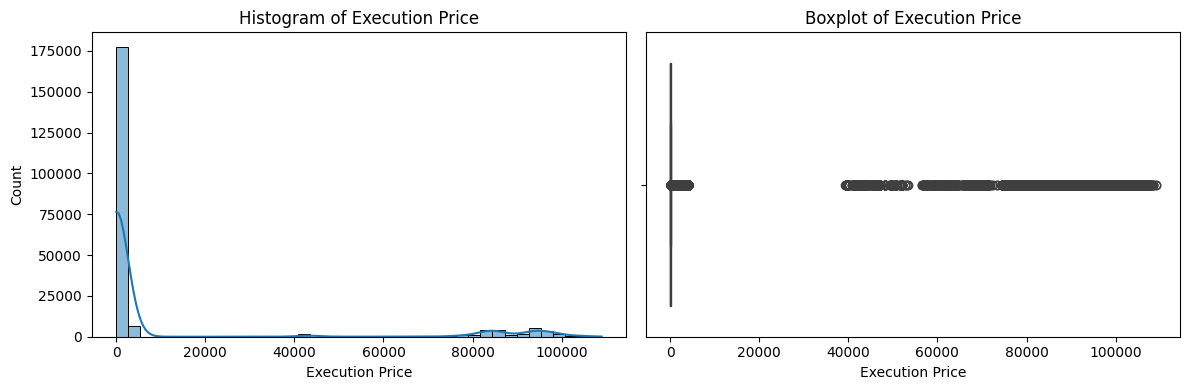

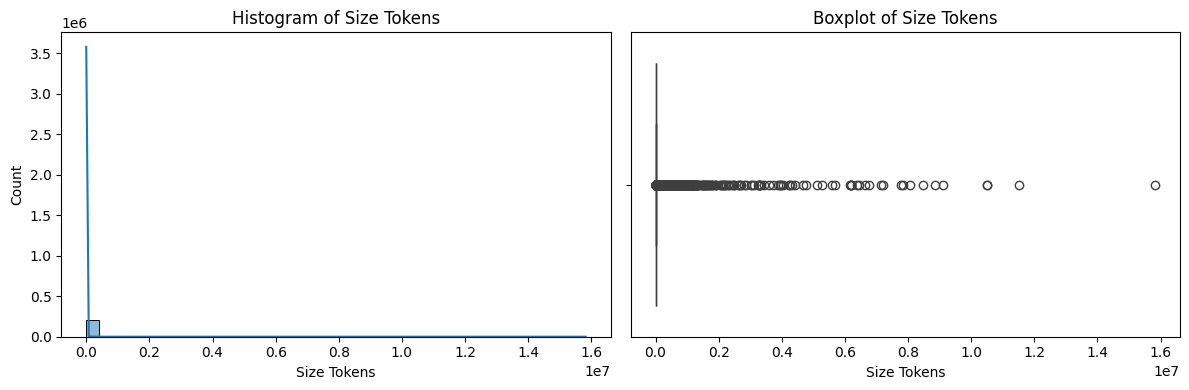

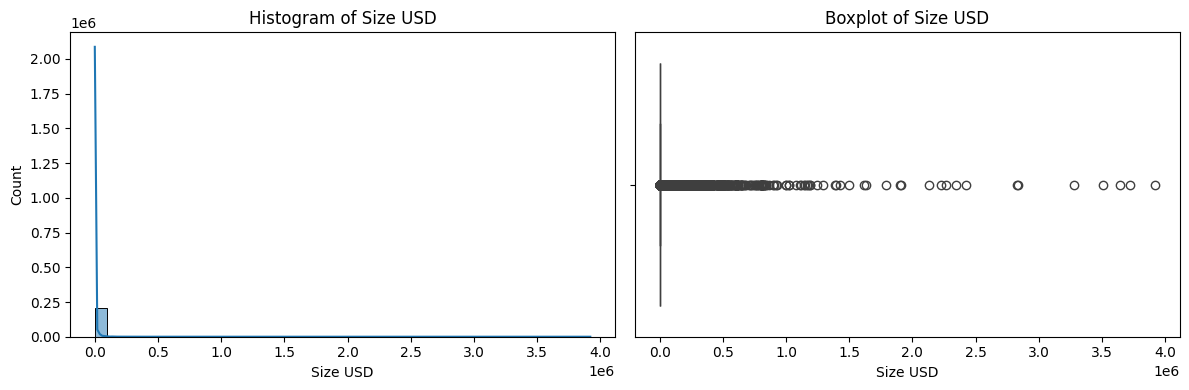

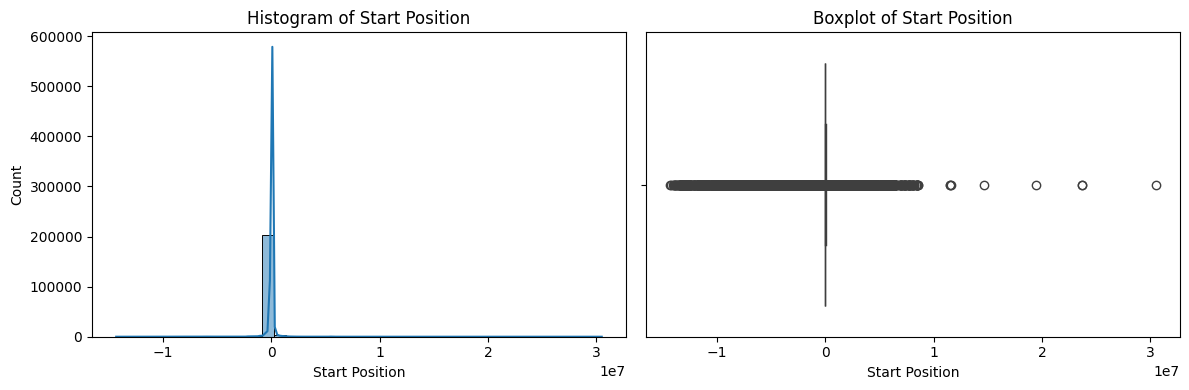

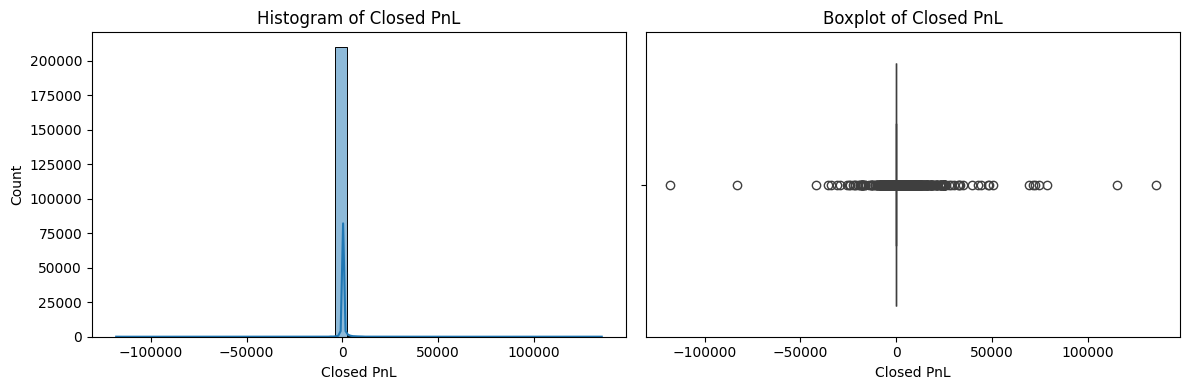

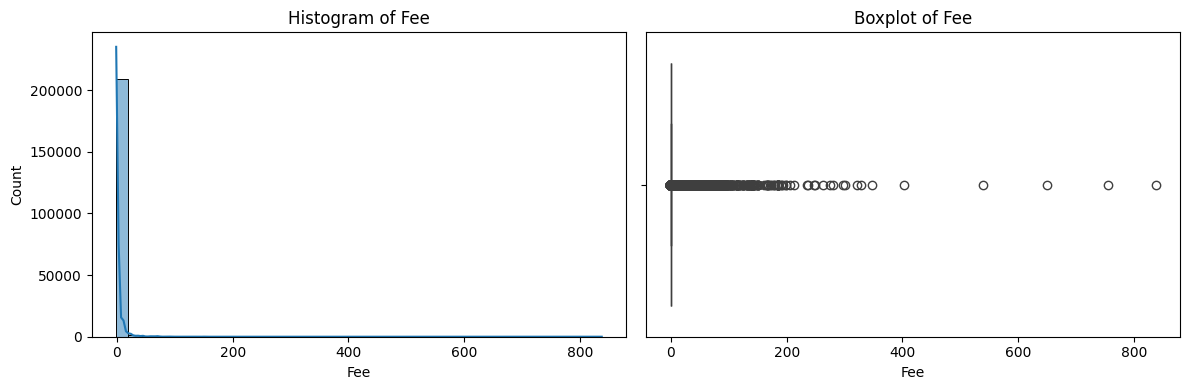

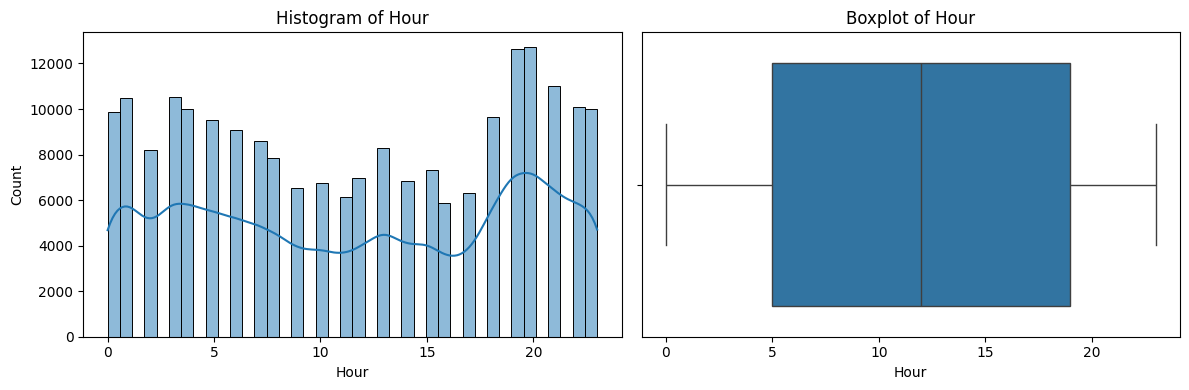

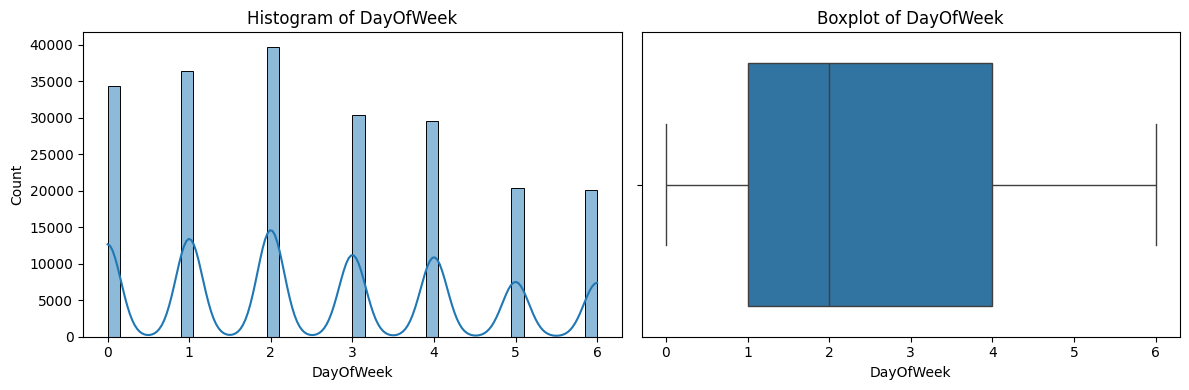

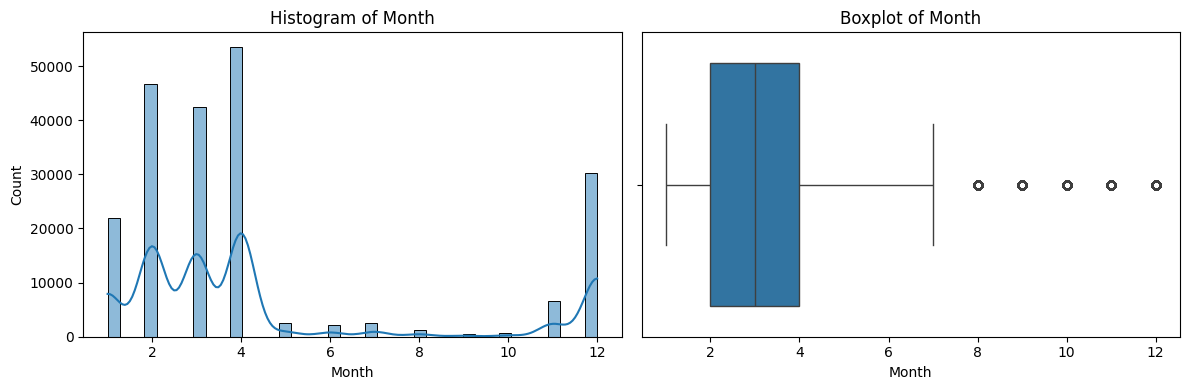

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Execution Price', 'Size Tokens', 'Size USD',
                  'Start Position', 'Closed PnL', 'Fee', 'Hour',
                  'DayOfWeek', 'Month']

for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(merged_df_dropped[col], kde=True, bins=40)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_df_dropped[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

### For categorical columns

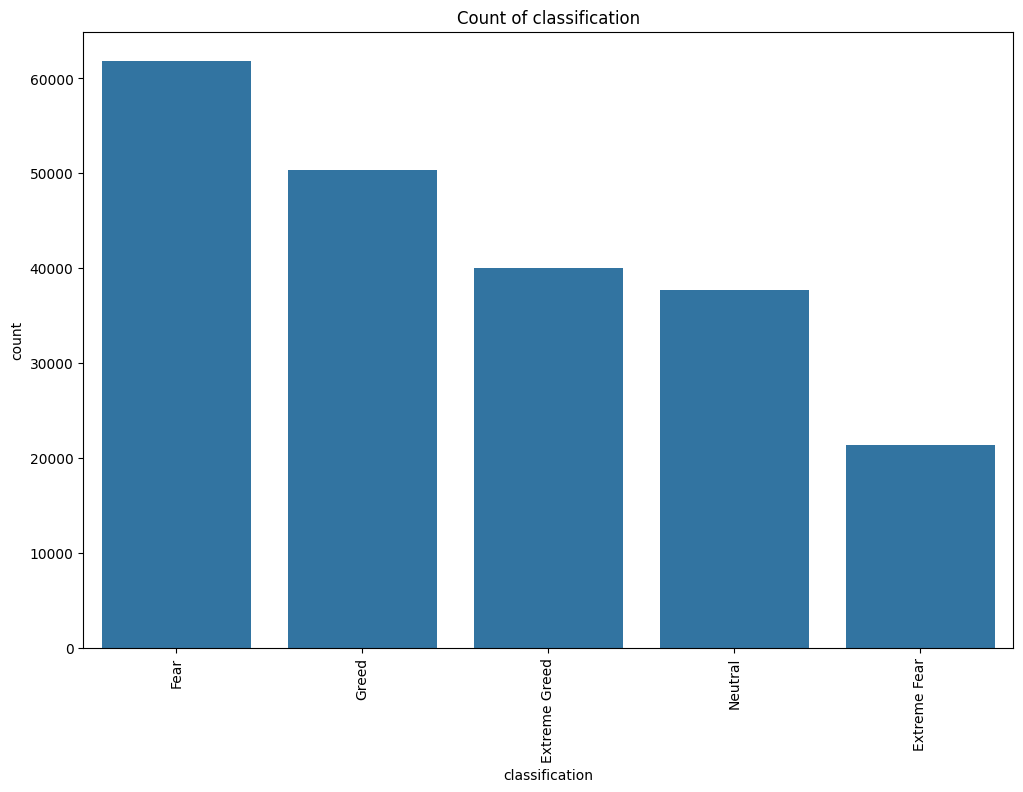

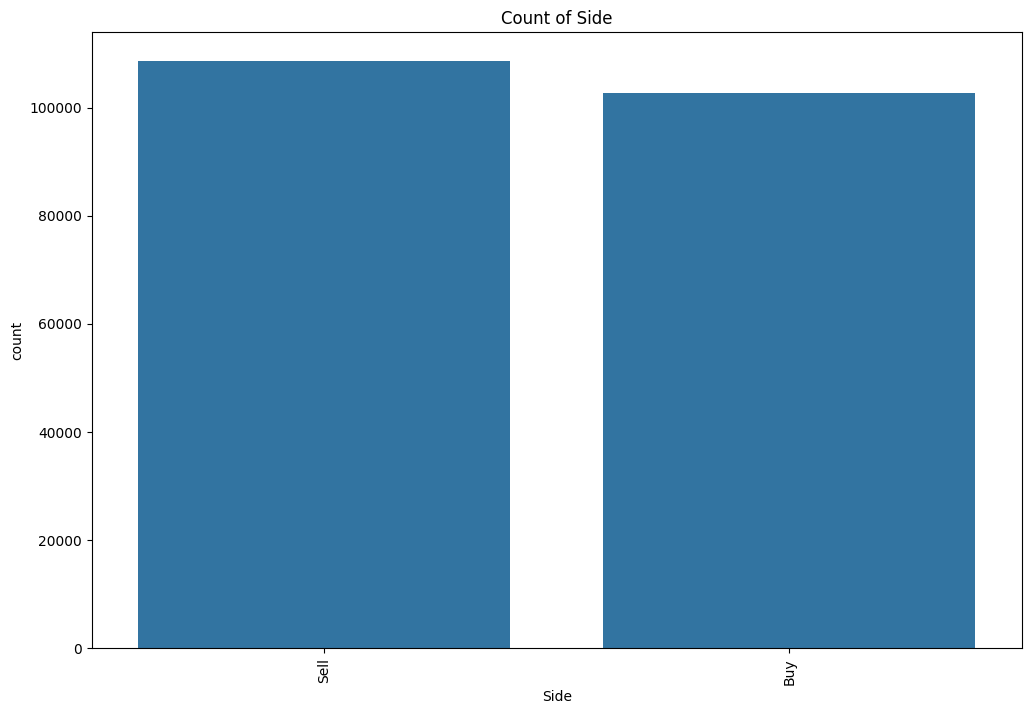

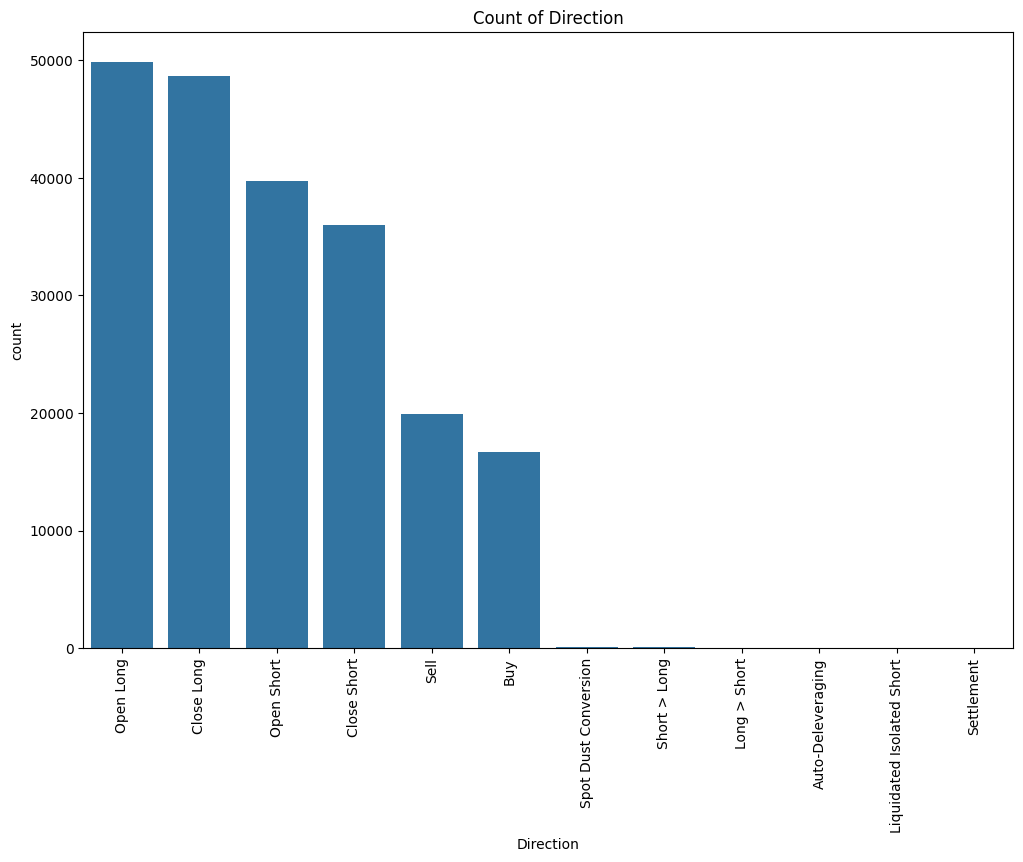

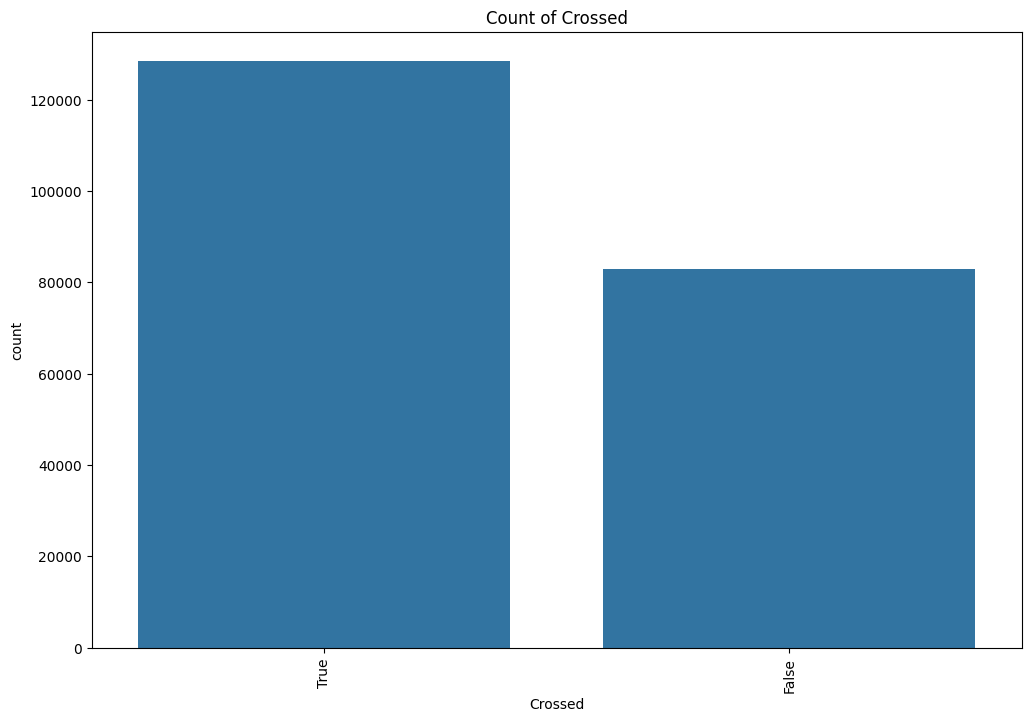

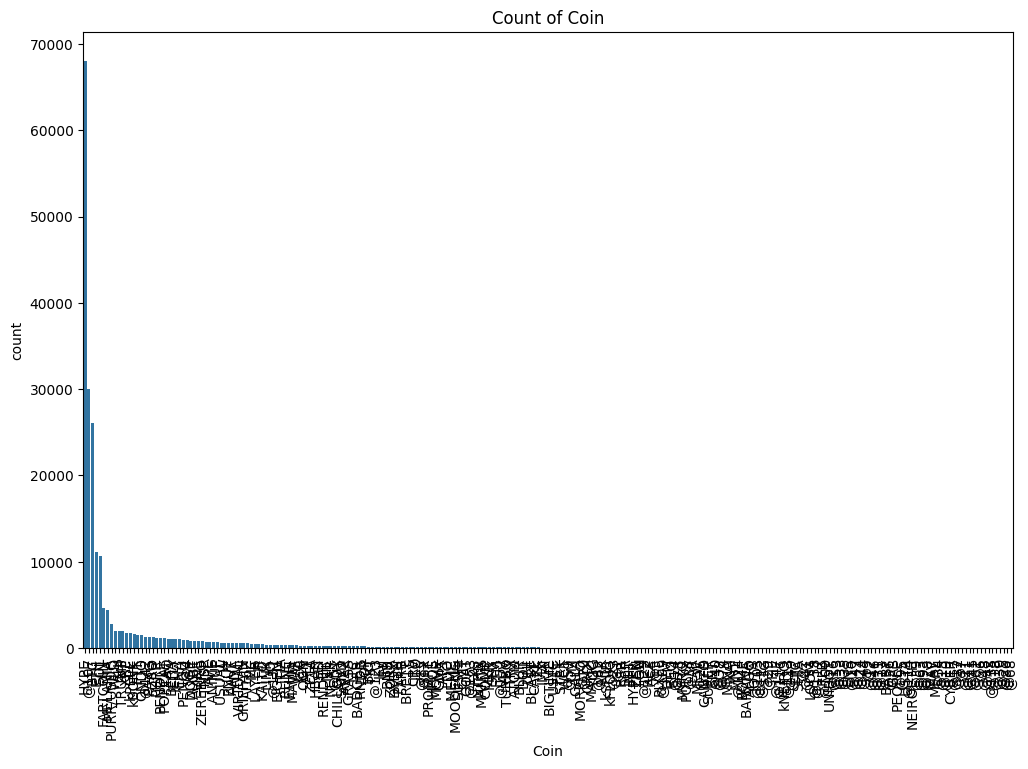

In [40]:
categorical_cols = ['classification', 'Side', 'Direction', 'Crossed', 'Coin']

for col in categorical_cols:
    plt.figure(figsize=(12,8))
    sns.countplot(data=merged_df_dropped, x=col, order=merged_df_dropped[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
    plt.show()

## Bivariate Analysis

### Boxplots: Numerical vs Sentiment

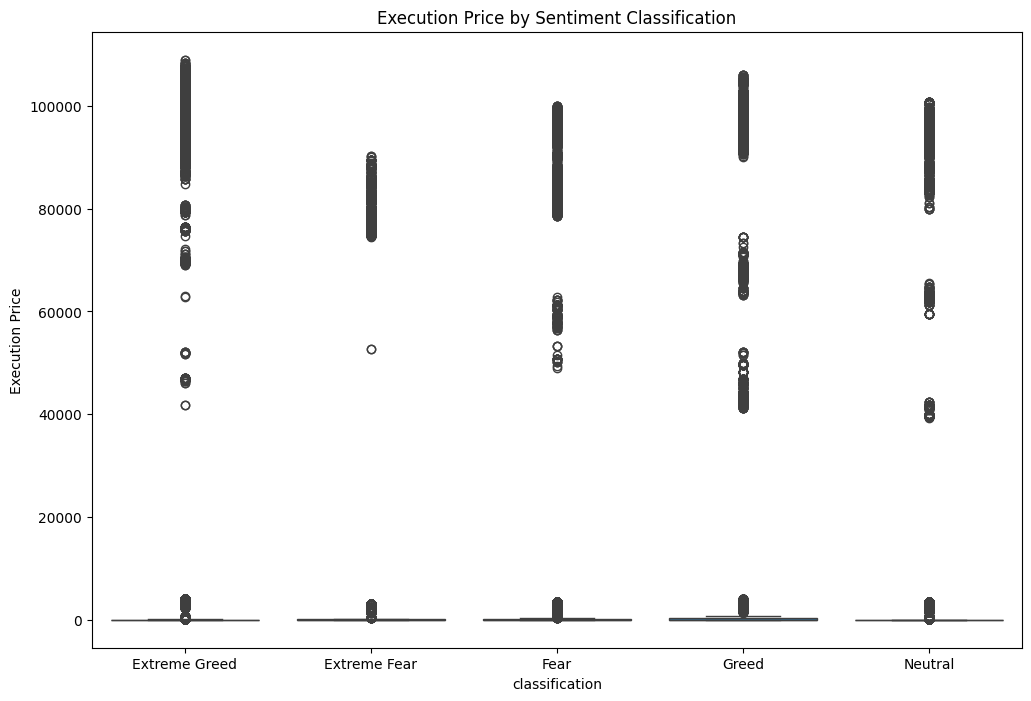

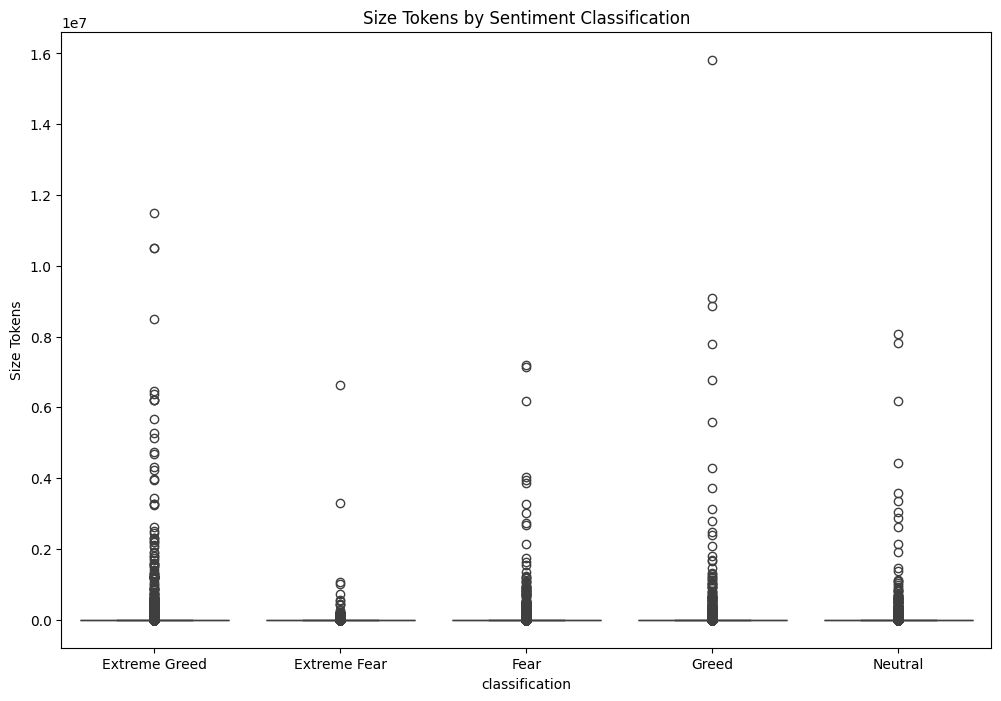

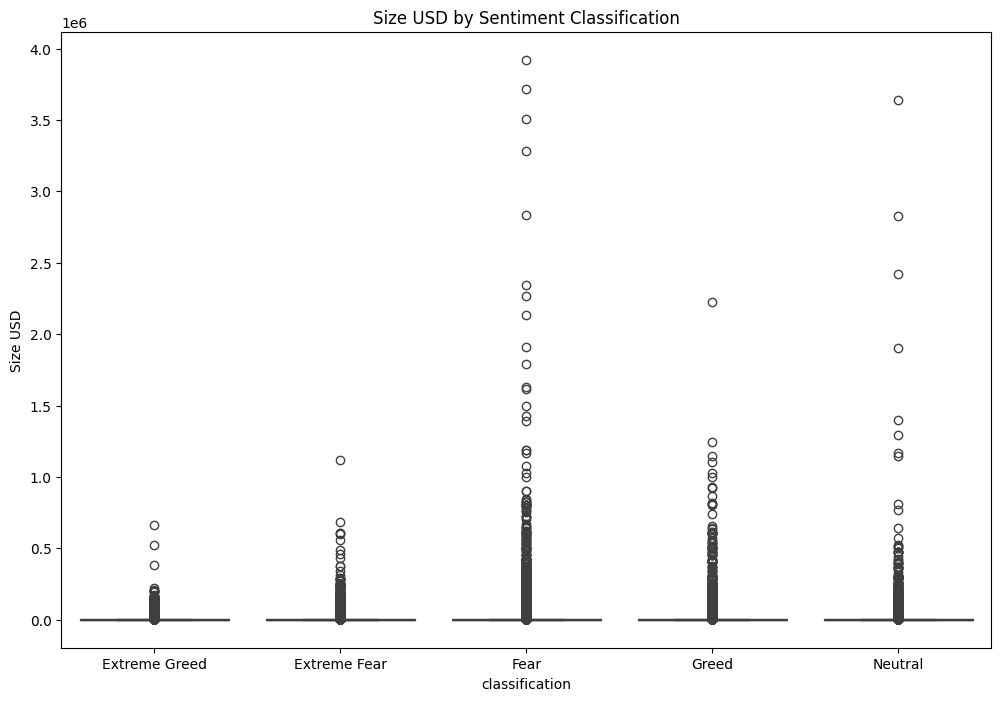

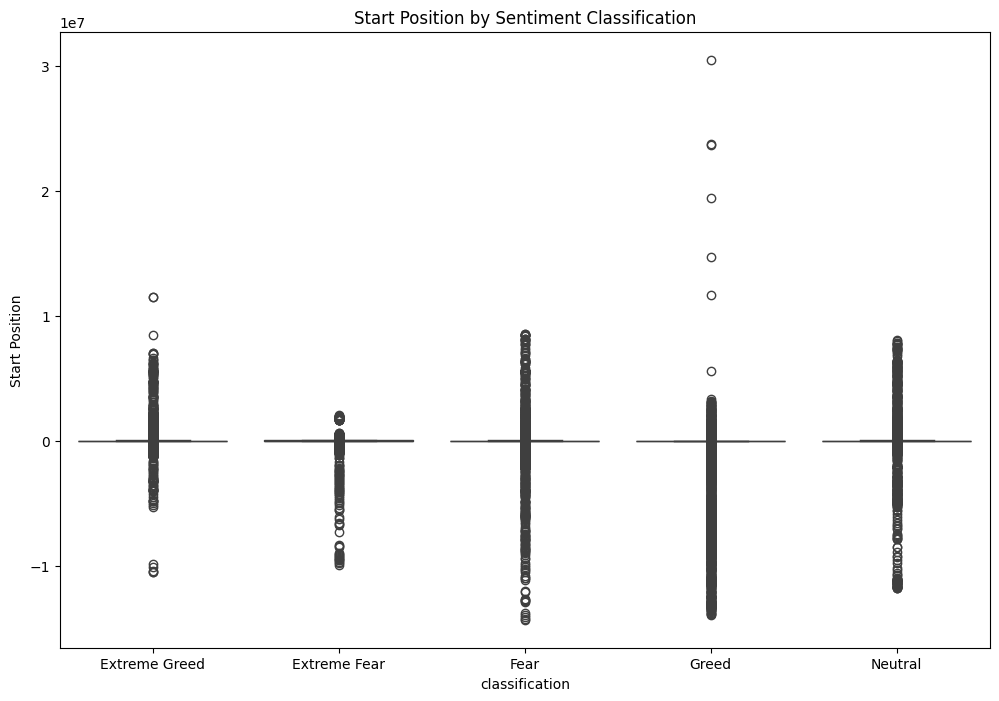

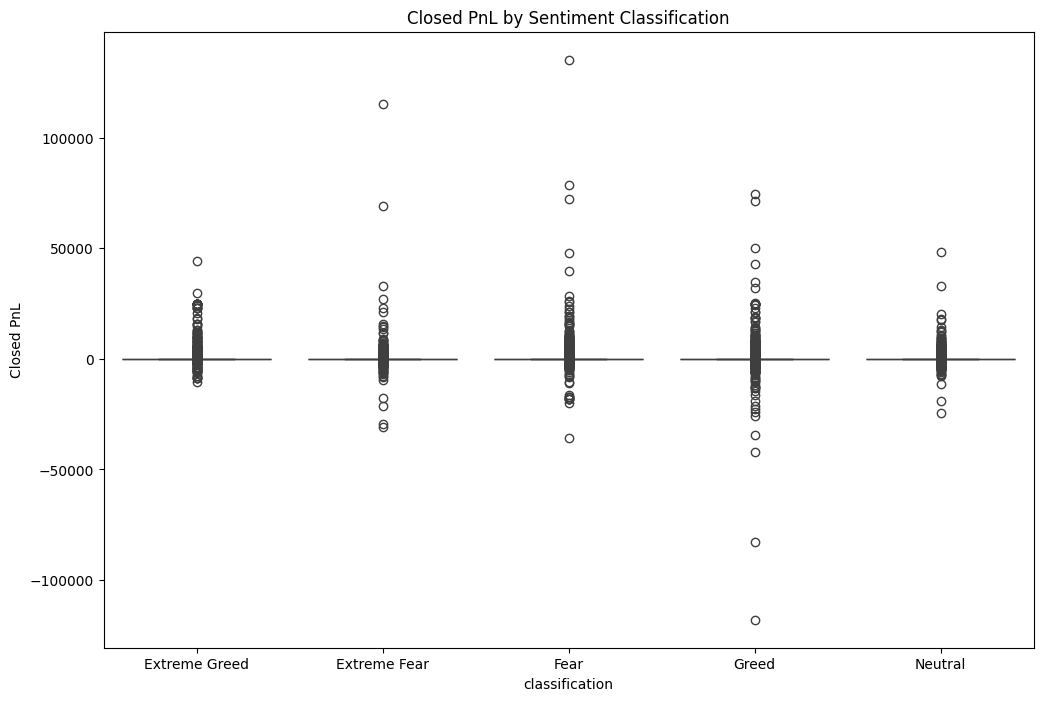

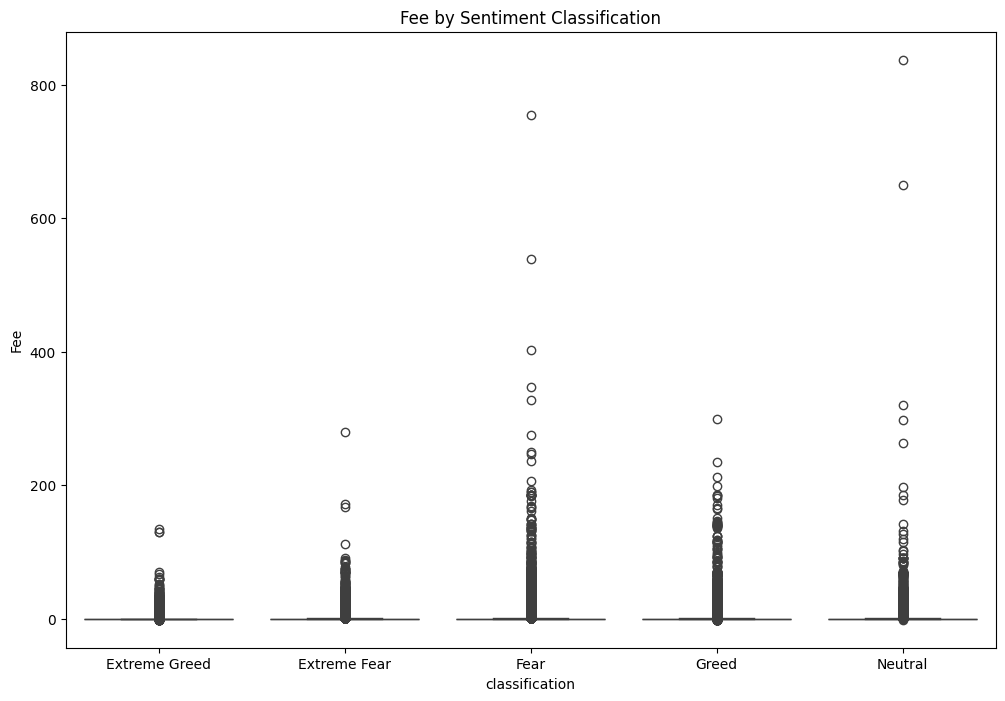

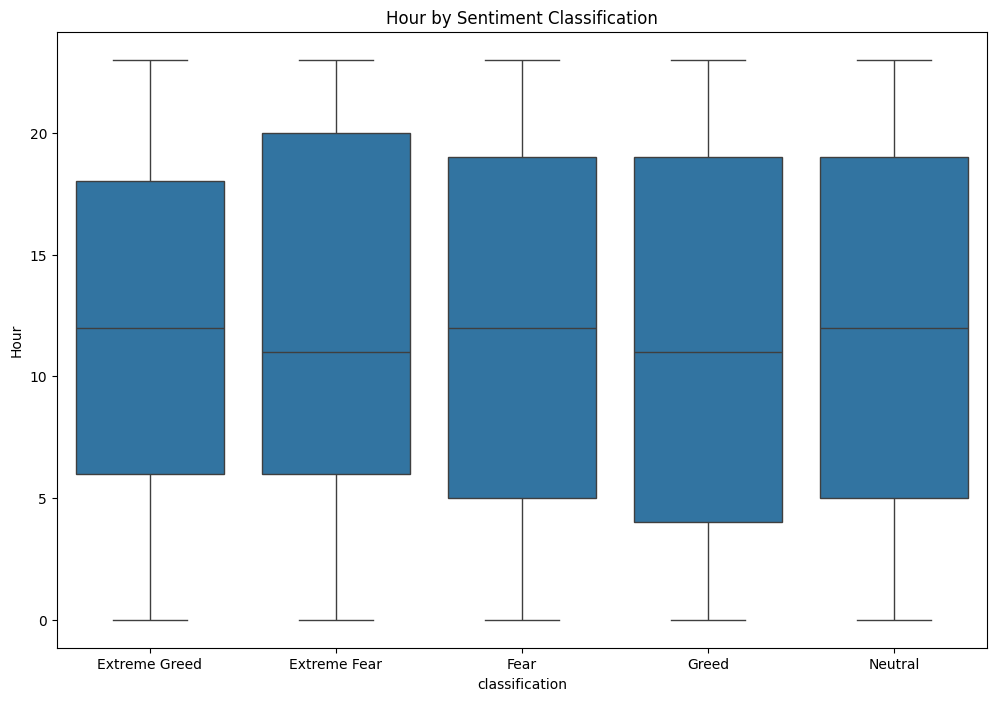

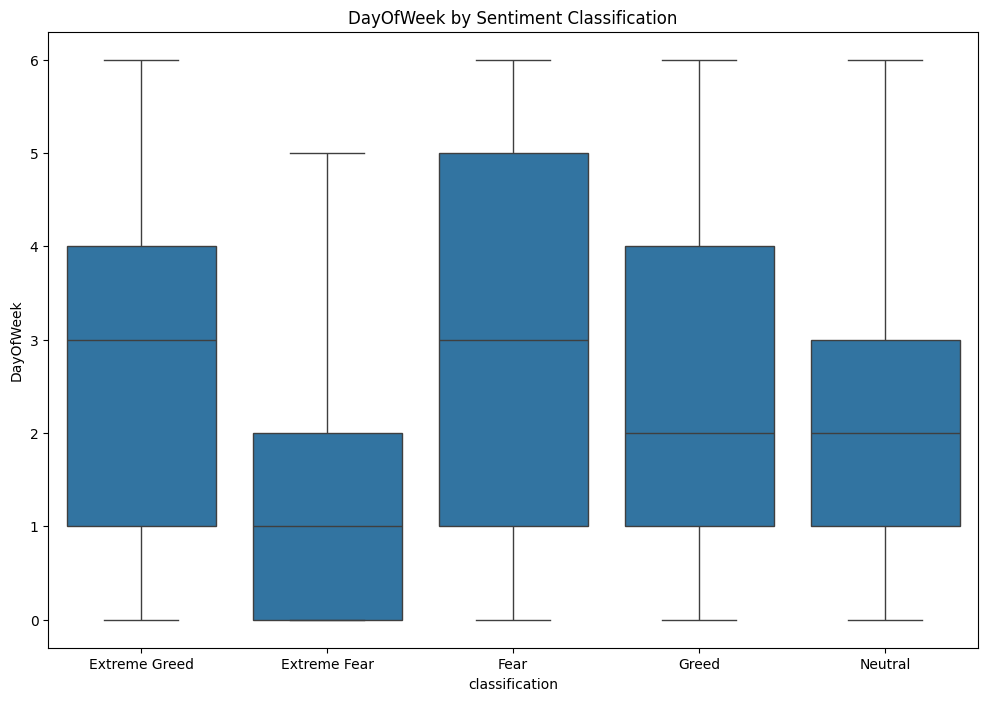

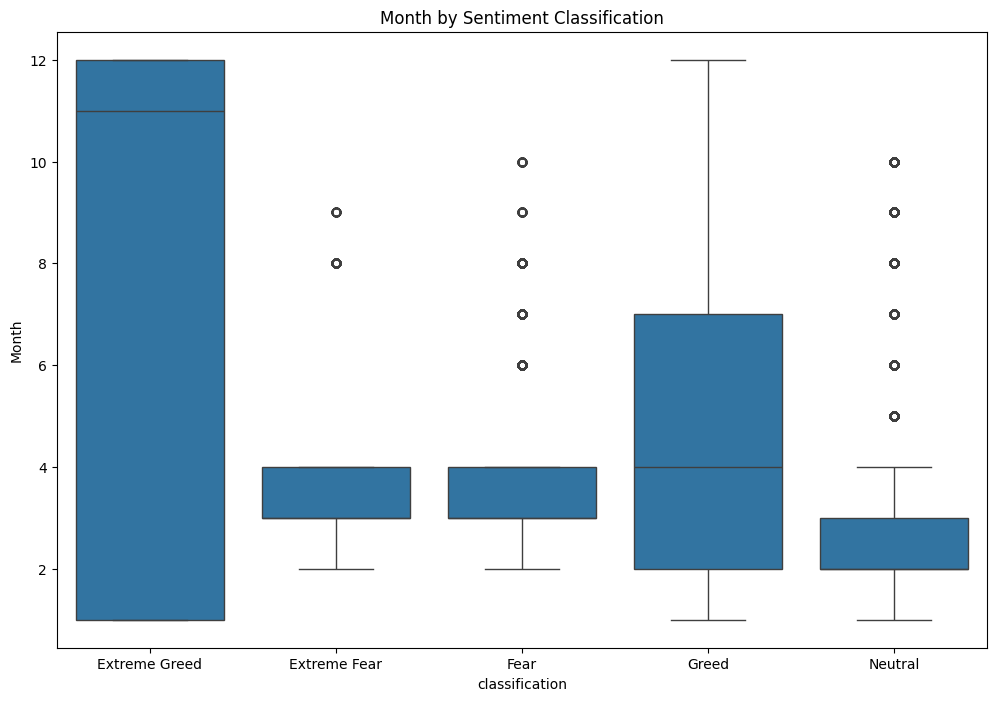

In [41]:
for col in numerical_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=merged_df_dropped, x='classification', y=col)
    plt.title(f'{col} by Sentiment Classification')
    plt.show()

### Scatterplots: Pairwise Numeric Relationships

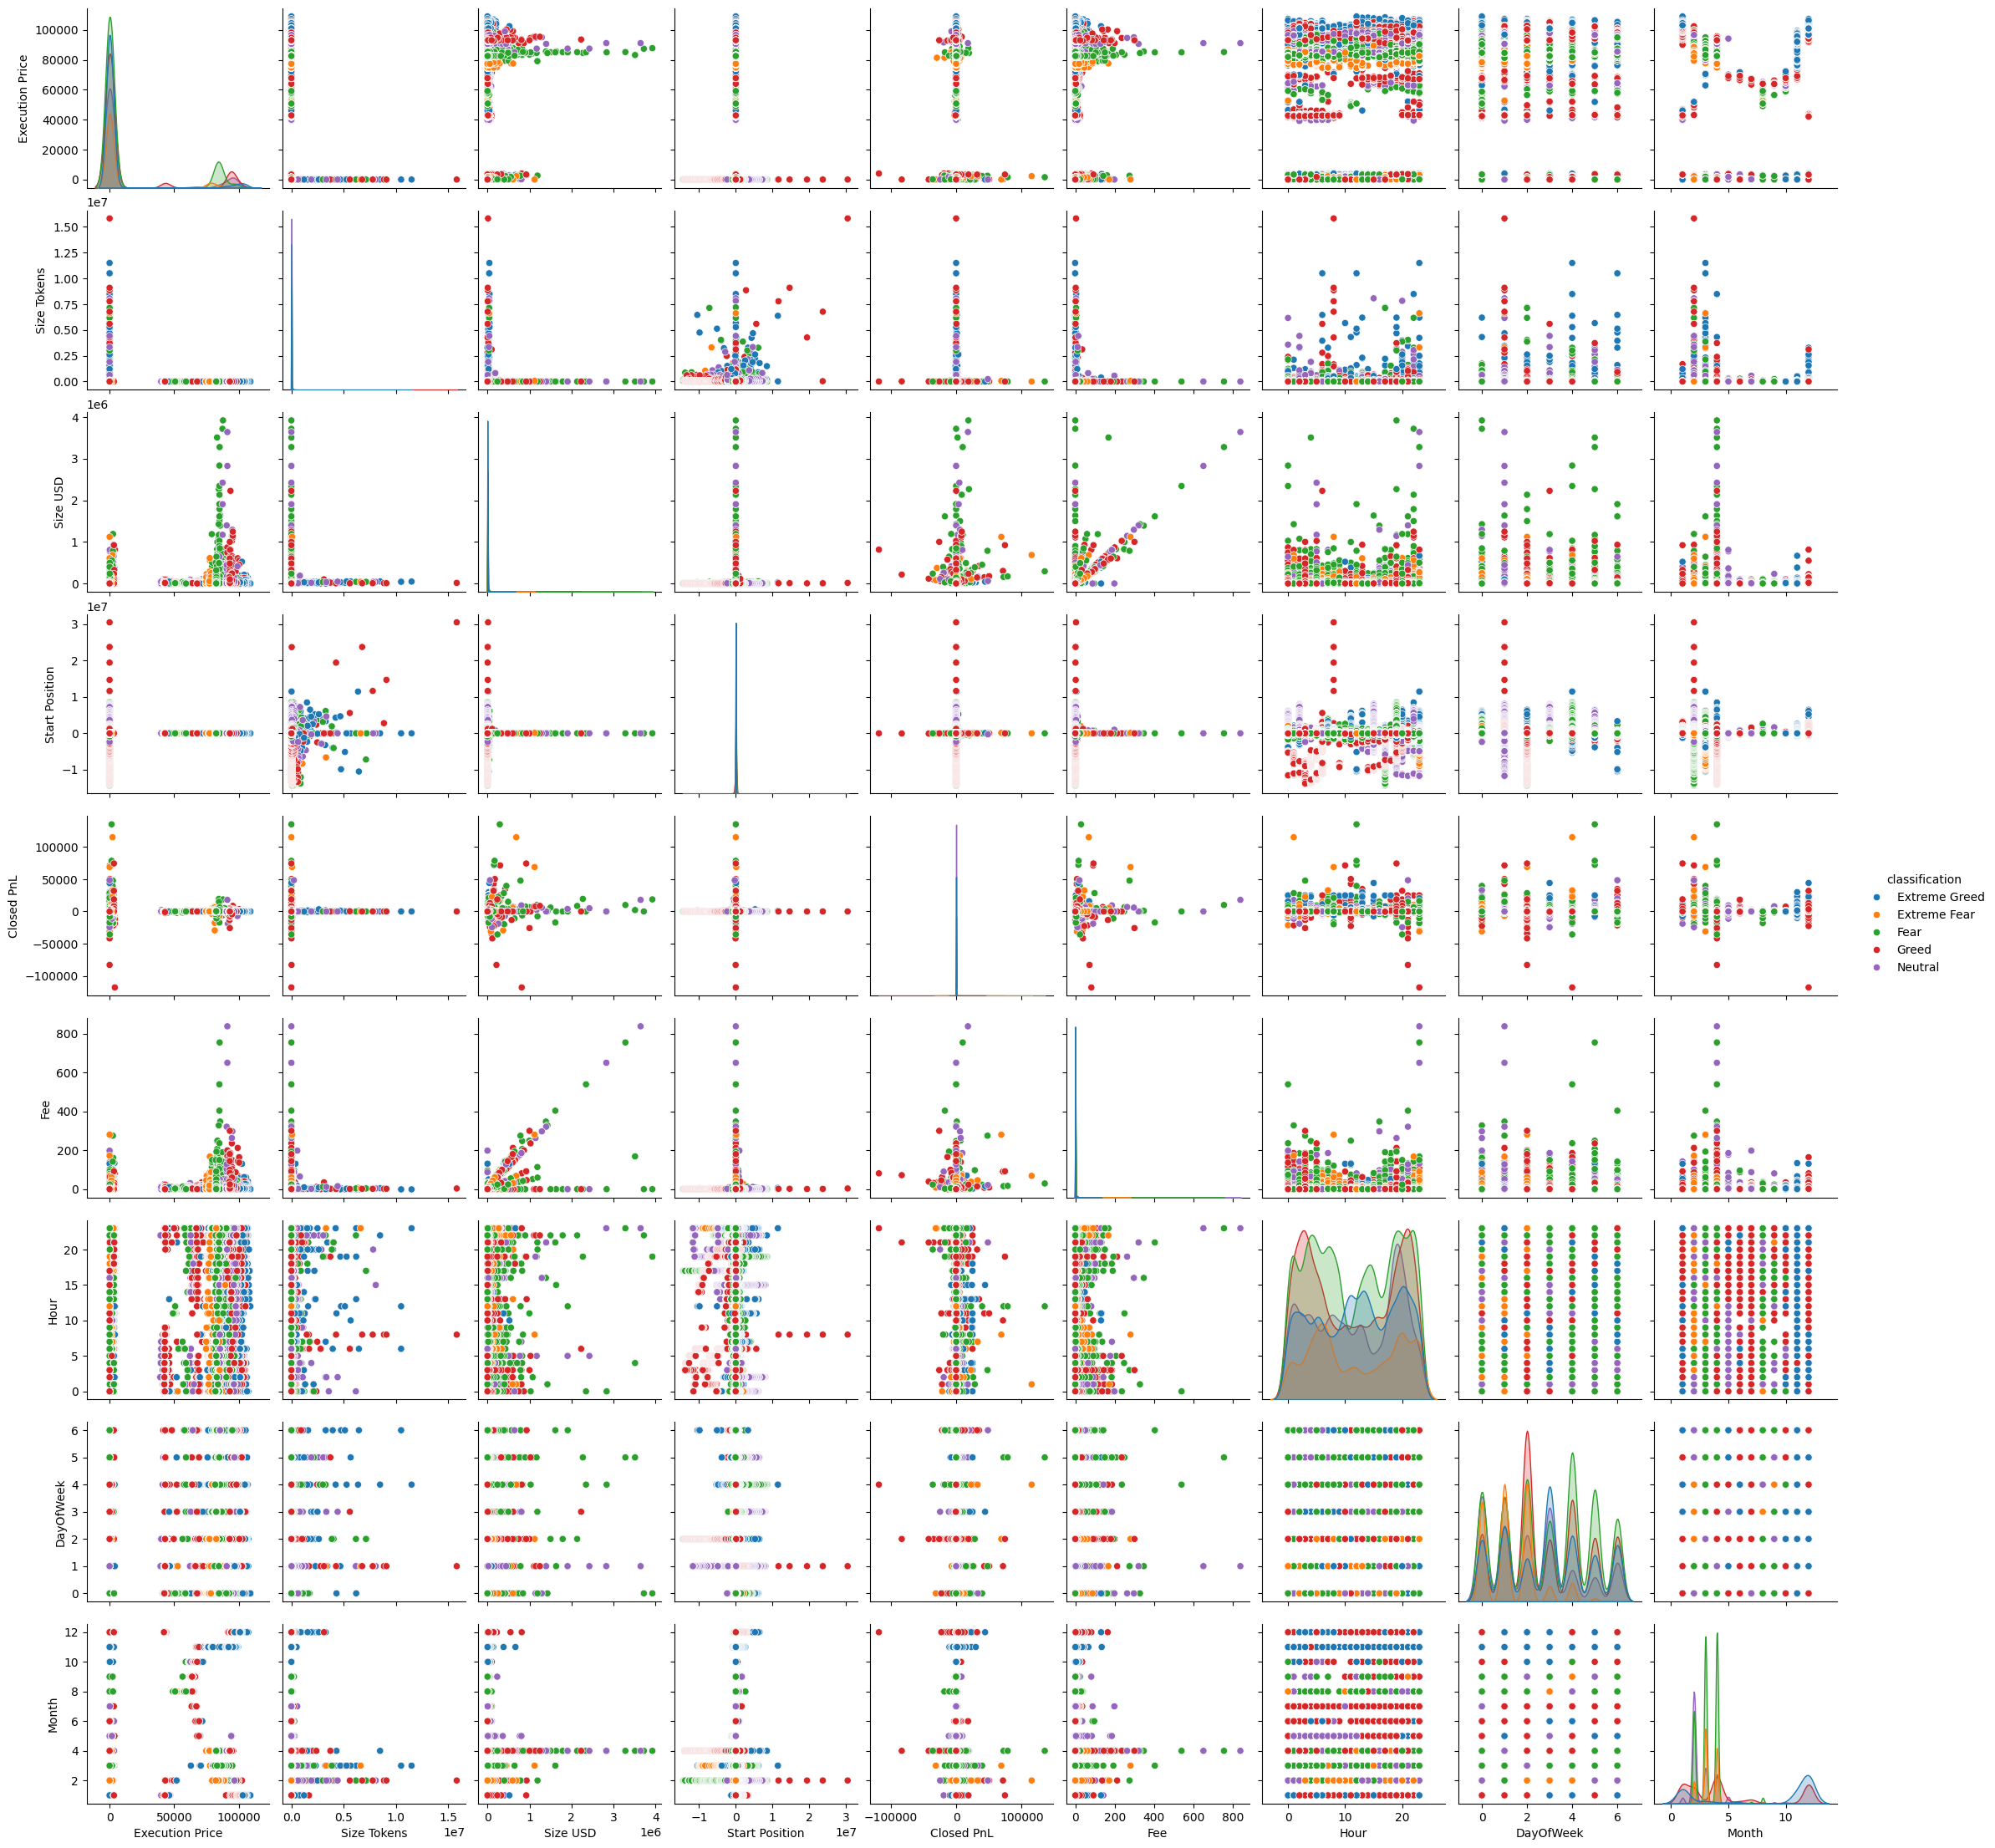

In [43]:
sns.pairplot(merged_df_dropped[numerical_cols + ['classification']], hue='classification')
plt.show()

### Correlation Heatmap

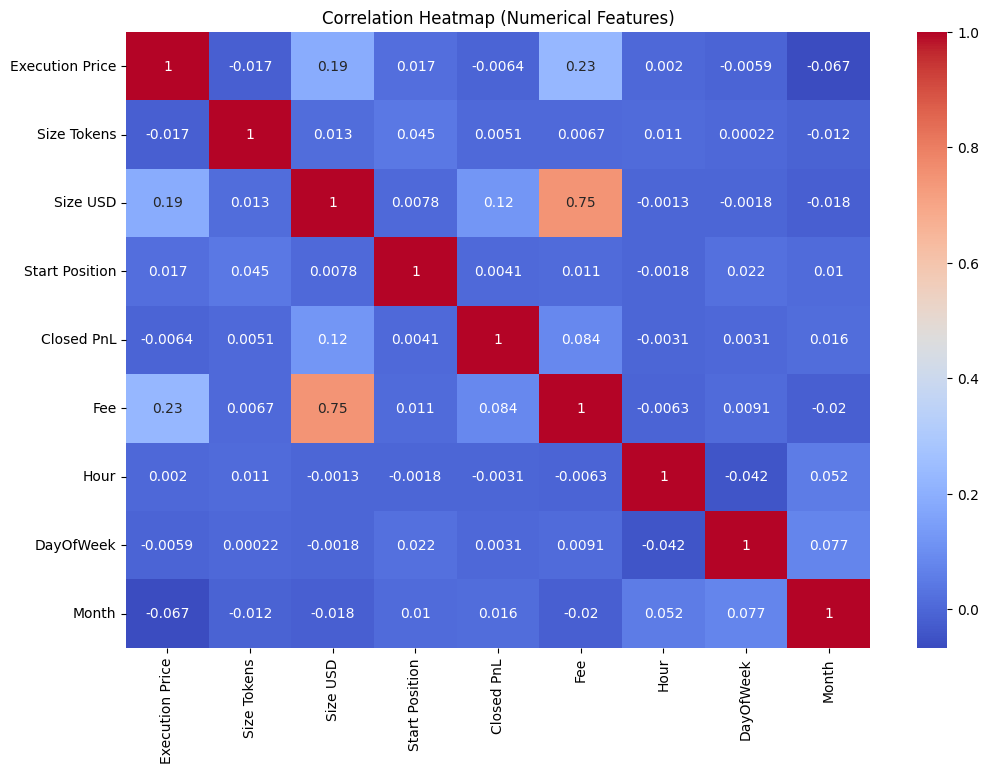

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df_dropped[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

### Categorical vs Categorical: Sentiment vs Side/Direction

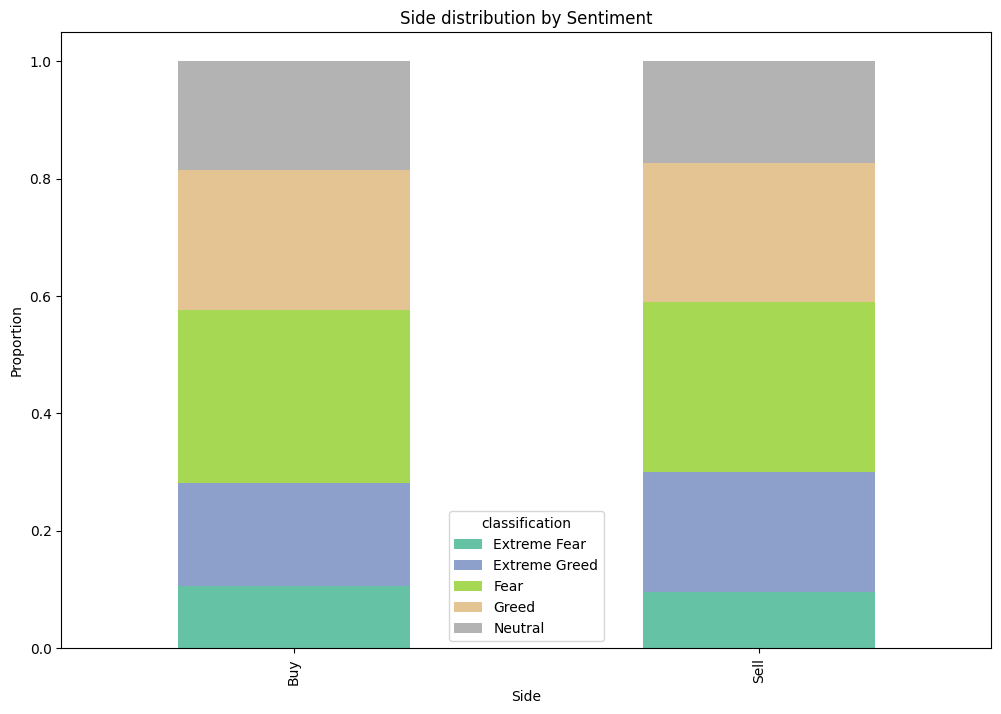

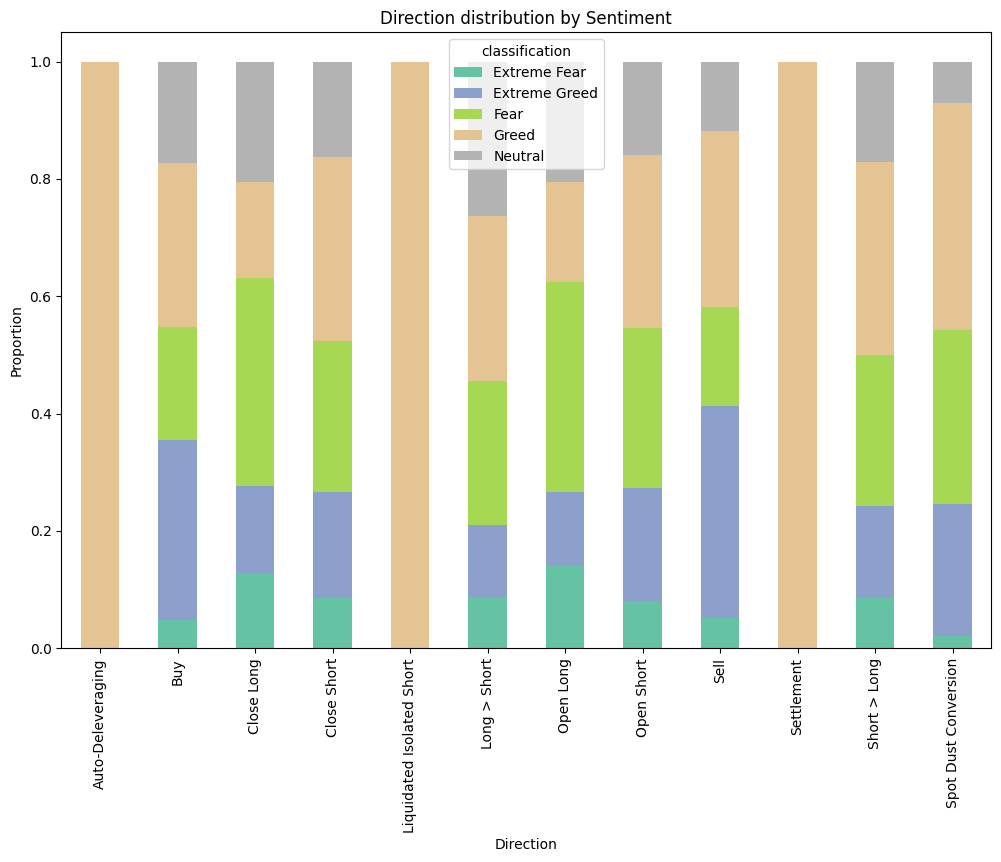

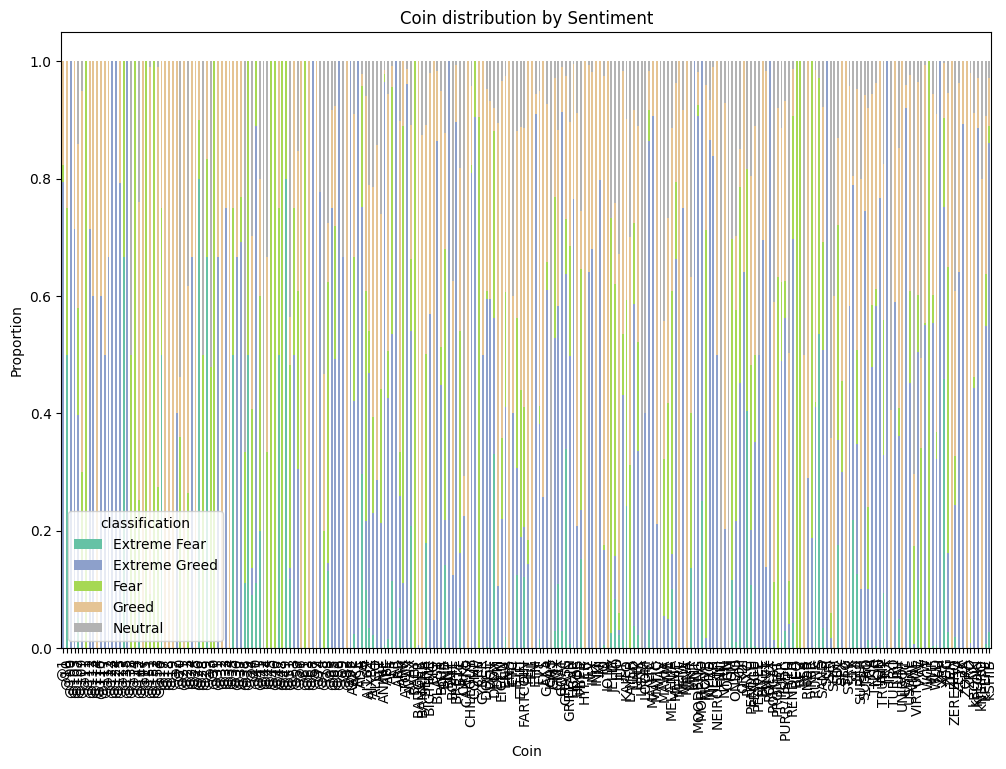

In [47]:
for col in ['Side', 'Direction', 'Coin']:
    ct = pd.crosstab(merged_df_dropped[col], merged_df_dropped['classification'], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(12,8), colormap='Set2')
    plt.title(f'{col} distribution by Sentiment')
    plt.ylabel('Proportion')
    plt.show()

Proportion of each sentiment category (Fear, Greed, Extreme Fear, Extreme Greed, Neutral) for each stock (coin)

In [57]:
sentiment_counts = merged_df_dropped.groupby(['Coin', 'classification']).size().unstack(fill_value=0)

sentiment_proportions = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)

sentiment_proportions = sentiment_proportions.round(3)

sentiment_proportions

classification  Extreme Fear  Extreme Greed   Fear  Greed  Neutral
Coin                                                              
@1                     0.000          0.794  0.029  0.176    0.000
@10                    0.500          0.000  0.250  0.250    0.000
@100                   0.000          1.000  0.000  0.000    0.000
@103                   0.000          0.714  0.000  0.286    0.000
@107                   0.051          0.347  0.182  0.280    0.140
...                      ...            ...    ...    ...      ...
kBONK                  0.000          0.443  0.018  0.451    0.088
kFLOKI                 0.000          0.886  0.000  0.086    0.029
kNEIRO                 0.000          0.000  0.000  0.800    0.200
kPEPE                  0.007          0.542  0.089  0.270    0.092
kSHIB                  0.028          0.833  0.028  0.083    0.028

[246 rows x 5 columns]

General sentiment based on coin

In [51]:
sentiment_counts = merged_df_dropped.groupby(['Coin', 'classification']).size().unstack(fill_value=0)
sentiment_proportions = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)

def classify_sentiment(row):
    for sentiment in row.index:
        if row[sentiment] > 0.5:
            return sentiment
    return 'Mixed'

dominant_sentiment = sentiment_proportions.apply(classify_sentiment, axis=1)

sentiment_df = sentiment_proportions.copy()
sentiment_df['Dominant Sentiment'] = dominant_sentiment

sentiment_df

classification  Extreme Fear  Extreme Greed      Fear     Greed   Neutral  \
Coin                                                                        
@1                  0.000000       0.794118  0.029412  0.176471  0.000000   
@10                 0.500000       0.000000  0.250000  0.250000  0.000000   
@100                0.000000       1.000000  0.000000  0.000000  0.000000   
@103                0.000000       0.714286  0.000000  0.285714  0.000000   
@107                0.050647       0.346859  0.182115  0.280008  0.140371   
...                      ...            ...       ...       ...       ...   
kBONK               0.000000       0.443230  0.018215  0.450516  0.088039   
kFLOKI              0.000000       0.885714  0.000000  0.085714  0.028571   
kNEIRO              0.000000       0.000000  0.000000  0.800000  0.200000   
kPEPE               0.006936       0.541618  0.089017  0.269942  0.092486   
kSHIB               0.027778       0.833333  0.027778  0.083333  0.027778   

classification Dominant Sentiment  
Coin                               
@1                  Extreme Greed  
@10                         Mixed  
@100                Extreme Greed  
@103                Extreme Greed  
@107                        Mixed  
...                           ...  
kBONK                       Mixed  
kFLOKI              Extreme Greed  
kNEIRO                      Greed  
kPEPE               Extreme Greed  
kSHIB               Extreme Greed  

[246 rows x 6 columns]

In [61]:
threshold = 0.5

def classify_sentiment_threshold(row):
    max_sentiment = row.idxmax()
    if row[max_sentiment] > threshold:
        return max_sentiment
    return 'Mixed'

sentiment_df['Dominant Sentiment'] = sentiment_df.drop(columns='Dominant Sentiment') \
    .apply(classify_sentiment_threshold, axis=1)

sentiment_groups_relaxed = sentiment_df.groupby('Dominant Sentiment') \
    .apply(lambda df: df.index.tolist()).to_dict()

for sentiment, coins in sentiment_groups_relaxed.items():
    print(f"{sentiment}: [{', '.join(coins)}]")

Extreme Fear: [@13, @26, @29, @49, S]
Extreme Greed: [@1, @100, @103, @112, @113, @116, @12, @123, @124, @125, @135, @24, @31, @33, @36, @37, @40, @68, @74, @83, @86, @9, @95, ACE, ANIME, AR, ATOM, BIGTIME, BLAST, BNT, BRETT, CHILLGUY, COMP, DOGE, DOT, FTM, GALA, GOAT, HBAR, ILV, IMX, INJ, LDO, LTC, MANTA, MEME, MEW, MNT, MOODENG, MORPHO, MYRO, NEAR, ORDI, PIXEL, POLYX, PURR/USDC, RENDER, SCR, STRK, STX, SUSHI, TNSR, TON, TRX, TURBO, USTC, W, WIF, XAI, ZETA, ZK, kFLOKI, kPEPE, kSHIB]
Fear: [@11, @14, @15, @152, @30, @45, @46, @48, @61, ARK, BABY, CRV, IP, MOVE, OM, PROMPT, REQ, REZ, RSR, WCT]
Greed: [@109, @114, @142, @147, @151, @153, @17, @18, @19, @2, @21, @25, @32, @34, @6, @63, @7, @93, ALGO, ARB, BADGER, BANANA, BIO, CANTO, DYM, EIGEN, ENS, FET, FIL, FTT, FXS, HPOS, HYPER, INIT, IO, IOTA, JTO, MATIC, MERL, MINA, NTRN, PNUT, RNDR, RUNE, SHIA, SPX, STG, SUPER, TAO, UNIBOT, WLD, ZEN, ZORA, ZRO, kNEIRO]
Mixed: [@10, @107, @117, @138, @16, @23, @28, @35, @39, @4, @41, @44, @47, @51, @

### Creating new features to analyse better

In [62]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Crossed', 'Fee',
       'classification', 'Hour', 'DayOfWeek', 'Week', 'Month'],
      dtype='object')

Performance Metrics per Trade

In [63]:
merged_df['Trade Value'] = merged_df['Execution Price'] * merged_df['Size Tokens']
merged_df['Win'] = (merged_df['Closed PnL'] > 0).astype(int)
merged_df

Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   

        Size Tokens  Size USD  Side  Start Position   Direction  Closed PnL  \
0            986.87   7872.16   Buy        0.000000         Buy      0.0000   
1             16.00    127.68   Buy      986.524596         Buy      0.0000   
2            144.09   1150.63   Buy     1002.518996         Buy      0.0000   
3            142.98   1142.04   Buy     1146.558564         Buy      0.0000   
4              8.73     69.75   Buy     1289.488521         Buy      0.0000   
...             ...       ...   ...             ...         ...         ...   
211219       382.20    420.80  Sell     7546.600000  Close Long    -20.2566   
211220      2124.10   2338.63  Sell     7164.400000  Close Long   -112.5773   
211221       423.40    466.16  Sell     5040.300000  Close Long    -22.4402   
211222      3599.80   3963.38  Sell     4616.900000  Close Long   -190.7894   
211223      1017.10   1119.83  Sell     1017.100000  Close Long    -53.9063   

        Crossed       Fee classification  Hour  DayOfWeek  Week  Month  \
0          True  0.345404  Extreme Greed    22          0    49     12   
1          True  0.005600  Extreme Greed    22          0    49     12   
2          True  0.050431  Extreme Greed    22          0    49     12   
3          True  0.050043  Extreme Greed    22          0    49     12   
4          True  0.003055  Extreme Greed    22          0    49     12   
...         ...       ...            ...   ...        ...   ...    ...   
211219    False  0.042080          Greed    15          4    17      4   
211220    False  0.233863          Greed    15          4    17      4   
211221    False  0.046616          Greed    15          4    17      4   
211222    False  0.396337          Greed    15          4    17      4   
211223    False  0.111982          Greed    15          4    17      4   

        Trade Value  Win  
0       7872.163303    0  
1        127.680000    0  
2       1150.630695    0  
3       1142.038452    0  
4         69.747462    0  
...             ...  ...  
211219   420.802200    0  
211220  2338.634100    0  
211221   466.163400    0  
211222  3963.379800    0  
211223  1119.827100    0  

[211218 rows x 18 columns]

Sentiment-Grouped Features

Group level aggregate

In [65]:
sentiment_grouped = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'std'],
    'Win': 'mean',
    'Fee': 'mean',
    'Trade Value': 'mean',
    'Size Tokens': 'mean',
    'Execution Price': 'mean'
}).round(3)
sentiment_grouped

Closed PnL              Win    Fee Trade Value Size Tokens  \
                     mean       std   mean   mean        mean        mean   
classification                                                              
Extreme Fear       34.538  1136.056  0.371  1.116    5349.732    1675.893   
Extreme Greed      67.893   766.828  0.465  0.676    3112.252    8832.416   
Fear               54.290   935.355  0.421  1.495    7816.110    2992.642   
Greed              42.744  1116.028  0.385  1.254    5736.884    4715.328   
Neutral            34.308   517.122  0.397  1.045    4782.733    4383.369   

               Execution Price  
                          mean  
classification                  
Extreme Fear          7054.795  
Extreme Greed         6082.196  
Fear                 14152.620  
Greed                13411.276  
Neutral              12393.693

Trader Behavior Under Sentiment

In [66]:
account_sentiment = merged_df.groupby(['Account', 'classification']).agg({
    'Closed PnL': 'sum',
    'Win': 'mean',
    'Trade Value': 'sum'
}).reset_index()
account_sentiment

Account classification    Closed PnL  \
0    0x083384f897ee0f19899168e3b1bec365f52a9012   Extreme Fear  1.247692e+05   
1    0x083384f897ee0f19899168e3b1bec365f52a9012  Extreme Greed -4.028234e+04   
2    0x083384f897ee0f19899168e3b1bec365f52a9012           Fear  1.113374e+06   
3    0x083384f897ee0f19899168e3b1bec365f52a9012          Greed  2.767193e+05   
4    0x083384f897ee0f19899168e3b1bec365f52a9012        Neutral  1.256501e+05   
..                                          ...            ...           ...   
151  0xbee1707d6b44d4d52bfe19e41f8a828645437aab   Extreme Fear  3.077409e+04   
152  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  Extreme Greed  4.788115e+05   
153  0xbee1707d6b44d4d52bfe19e41f8a828645437aab           Fear  5.597880e+04   
154  0xbee1707d6b44d4d52bfe19e41f8a828645437aab          Greed  2.433995e+05   
155  0xbee1707d6b44d4d52bfe19e41f8a828645437aab        Neutral  2.711668e+04   

          Win   Trade Value  
0    0.370000  1.507101e+06  
1    0.066667  1.141586e+07  
2    0.526434  3.026244e+07  
3    0.160279  8.686991e+06  
4    0.581948  9.824877e+06  
..        ...           ...  
151  0.413270  7.342854e+06  
152  0.596311  1.652788e+07  
153  0.376560  1.939568e+07  
154  0.464704  1.760161e+07  
155  0.347783  1.323978e+07  

[156 rows x 5 columns]

Pivot table helps us in understanding the traders better by analyzing their performance in different market sentiments. if the performance diff is negative, the trader is greed-favoring otherwise they are fear favoring.

In [70]:
pivot = account_sentiment.pivot(index='Account', columns='classification', values='Closed PnL').fillna(0)
pivot['greed_fear_diff'] = pivot.get('Greed', 0) - pivot.get('Fear', 0)
pivot['extreme_greed_fear_diff'] = pivot.get('Extreme Greed', 0) - pivot.get('Extreme Fear', 0)
pivot

classification                               Extreme Fear  Extreme Greed  \
Account                                                                    
0x083384f897ee0f19899168e3b1bec365f52a9012  124769.221441  -4.028234e+04   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   -4235.153051   3.565889e+04   
0x271b280974205ca63b716753467d5a371de622ab   16706.884912   1.793160e+03   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  -25666.012284   1.080100e+05   
0x2c229d22b100a7beb69122eed721cee9b24011dd   11415.247787   9.089505e+04   
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  -56967.825773   3.099218e+04   
0x39cef799f8b69da1995852eea189df24eb5cae3c  -76179.494853   1.440638e+04   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6     110.553364   3.687016e+04   
0x420ab45e0bd8863569a5efbb9c05d91f40624641    9461.082288   4.019619e+03   
0x430f09841d65beb3f27765503d0f850b8bce7713       0.000000   1.242849e+05   
0x47add9a56df66b524d5e2c1993a43cde53b6ed85  -14527.442518   6.727595e+04   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  166696.399486   2.049605e+04   
0x4f93fead39b70a1824f981a54d4e55b278e9f760   74346.546606   1.292177e+05   
0x513b8629fe877bb581bf244e326a047b249c4ff1  -71121.820704   0.000000e+00   
0x6d6a4b953f202f8df5bed40692e7fd865318264a    2037.258612   7.319208e+04   
0x72743ae2822edd658c0c50608fd7c5c501b2afbd   33980.000000   0.000000e+00   
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  198900.561610   5.735853e+02   
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   25672.838055   2.107269e+05   
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f    3222.822132   1.260833e+03   
0x8170715b3b381dffb7062c0298972d4727a0a63b   12713.493131  -1.913591e+04   
0x8381e6d82f1affd39a336e143e081ef7620a3b7f   -4825.496358   1.171768e+01   
0x8477e447846c758f5a675856001ea72298fd9cb5    1774.309786   5.607141e+04   
0x92f17e8d81a944691c10e753af1b1baae1a2cd0d    3425.960950   6.352027e+04   
0xa0feb3725a9335f49874d7cd8eaad6be45b27416    1011.258943   4.779125e+04   
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0    -961.048507   4.641127e+04   
0xae5eacaf9c6b9111fd53034a602c192a04e082ed     622.410790   2.092551e+04   
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb       0.000000   1.524474e+01   
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    9544.906134   1.105305e+06   
0xb899e522b5715391ae1d4f137653e7906c5e2115  -33221.806818   0.000000e+00   
0xbaaaf6571ab7d571043ff1e313a9609a10637864  261917.977792   0.000000e+00   
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3   37712.523409   6.053161e+03   
0xbee1707d6b44d4d52bfe19e41f8a828645437aab   30774.092128   4.788115e+05   

classification                                      Fear          Greed  \
Account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012  1.113374e+06  276719.270187   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd -1.658737e+03   30053.395556   
0x271b280974205ca63b716753467d5a371de622ab  3.012191e+04 -100019.806374   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.342252e+04   31192.591971   
0x2c229d22b100a7beb69122eed721cee9b24011dd  3.979191e+03   20075.672949   
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891 -4.670589e+02   -3531.989984   
0x39cef799f8b69da1995852eea189df24eb5cae3c  5.468502e+04   10591.760255   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6  4.256559e+03    4239.816383   
0x420ab45e0bd8863569a5efbb9c05d91f40624641  9.964828e+04   12082.950000   
0x430f09841d65beb3f27765503d0f850b8bce7713  5.615052e+03  227680.491734   
0x47add9a56df66b524d5e2c1993a43cde53b6ed85  9.999484e+03   36566.483324   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  2.967817e+05   96392.783186   
0x4f93fead39b70a1824f981a54d4e55b278e9f760 -1.912616e+04   79023.471493   
0x513b8629fe877bb581bf244e326a047b249c4ff1  3.671662e+05  163047.664946   
0x6d6a4b953f202f8df5bed40692e7fd865318264a  2.040359e+03   30203.401038   
0x72743ae2822edd658c0c50608fd7c5c501b2afbd -5.821975e+04  453595.318176   
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  1.445143e+05   21077.

Behavioral Features

In [77]:
merged_df['Is High Leverage'] = (merged_df['Fee'] > merged_df['Fee'].quantile(0.75)).astype(int)
merged_df['Is Large Trade'] = (merged_df['Trade Value'] > merged_df['Trade Value'].quantile(0.75)).astype(int)

# Step 2: Group by Account and calculate proportion of high-risk behaviors
account_risk_behavior = merged_df.groupby('Account').agg(
    HighLeverageFreq=('Is High Leverage', 'mean'),   # Proportion of high-fee trades
    LargeTradeFreq=('Is Large Trade', 'mean'),       # Proportion of large trades
    TotalTrades=('Is High Leverage', 'count')
).reset_index()

# Optional: Tag high-risk traders
account_risk_behavior['HighRiskTrader'] = (
    (account_risk_behavior['HighLeverageFreq'] > 0.5) |
    (account_risk_behavior['LargeTradeFreq'] > 0.5)
).astype(int)

account_risk_behavior

Account  HighLeverageFreq  \
0   0x083384f897ee0f19899168e3b1bec365f52a9012          0.323468   
1   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd          0.170467   
2   0x271b280974205ca63b716753467d5a371de622ab          0.388553   
3   0x28736f43f1e871e6aa8b1148d38d4994275d72c4          0.108407   
4   0x2c229d22b100a7beb69122eed721cee9b24011dd          0.389626   
5   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891          0.095706   
6   0x39cef799f8b69da1995852eea189df24eb5cae3c          0.148509   
7   0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6          0.259036   
8   0x420ab45e0bd8863569a5efbb9c05d91f40624641          0.313316   
9   0x430f09841d65beb3f27765503d0f850b8bce7713          0.193209   
10  0x47add9a56df66b524d5e2c1993a43cde53b6ed85          0.067144   
11  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4          0.424013   
12  0x4f93fead39b70a1824f981a54d4e55b278e9f760          0.740506   
13  0x513b8629fe877bb581bf244e326a047b249c4ff1          0.493380   
14  0x6d6a4b953f202f8df5bed40692e7fd865318264a          0.104615   
15  0x72743ae2822edd658c0c50608fd7c5c501b2afbd          0.259748   
16  0x72c6a4624e1dffa724e6d00d64ceae698af892a0          0.122893   
17  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4          0.140402   
18  0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f          0.164208   
19  0x8170715b3b381dffb7062c0298972d4727a0a63b          0.153010   
20  0x8381e6d82f1affd39a336e143e081ef7620a3b7f          0.296703   
21  0x8477e447846c758f5a675856001ea72298fd9cb5          0.150687   
22  0x92f17e8d81a944691c10e753af1b1baae1a2cd0d          0.386304   
23  0xa0feb3725a9335f49874d7cd8eaad6be45b27416          0.052291   
24  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0          0.103118   
25  0xae5eacaf9c6b9111fd53034a602c192a04e082ed          0.460036   
26  0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb          0.222846   
27  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          0.380710   
28  0xb899e522b5715391ae1d4f137653e7906c5e2115          0.646341   
29  0xbaaaf6571ab7d571043ff1e313a9609a10637864          0.205927   
30  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3          0.319576   
31  0xbee1707d6b44d4d52bfe19e41f8a828645437aab          0.218744   

    LargeTradeFreq  TotalTrades  HighRiskTrader  
0         0.461236         3818               0  
1         0.176374         7280               0  
2         0.363875         3809               0  
3         0.051987        13311               0  
4         0.305032         3239               0  
5         0.166871          815               0  
6         0.244079         3589               0  
7         0.325301          332               0  
8         0.436031          383               0  
9         0.257074         1237               0  
10        0.023946         8519               0  
11        0.413223         4356               0  
12        0.681303         7584               1  
13        0.550588        12236               1  
14        0.084103          975               0  
15        0.340881         1590               0  
16        0.214185         1424               0  
17        0.193470         9893               0  
18        0.211033         1559               0  
19        0.192784         4601               0  
20        0.344846         1911               0  
21        0.100213        14998               0  
22        0.344364         3052               0  
23        0.129061        15605               0  
24        0.122302          417               0  
25        0.314387          563               0  
26        0.331461          534               0  
27        0.284735        14733               0  
28        0.646135         4838               1  
29        0.250236        21192               0  
30        0.333207         2641               0  
31        0.198736        40184               0

New dataframe where each row represents an (Account, Sentiment) combination

In [86]:
trader_sentiment_df = (
    merged_df.groupby(['Account', 'classification'])
    .agg(
        Trades=('Closed PnL', 'count'),
        WinRate=('Win', 'mean'),
        AvgPnL=('Closed PnL', 'mean'),
        TotalPnL=('Closed PnL', 'sum'),
        StdPnL=('Closed PnL', 'std'),
        ROI=('Closed PnL', lambda x: x.sum() / abs(x.sum()) if x.sum() != 0 else 0),
        AvgTradeValue=('Trade Value', 'mean'),
        MaxDrawdown=('Closed PnL', lambda x: x.cumsum().min()),
        TradingFreq=('Closed PnL', 'count'),
    )
    .reset_index()
)

# Compare trader metrics across sentiment
performance_pivot = trader_sentiment_df.pivot(index='Account', columns='classification', values='TotalPnL').fillna(0)

# Compute performance differences
performance_pivot['Greed_vs_Fear'] = performance_pivot.get('Greed', 0) - performance_pivot.get('Fear', 0)
performance_pivot['Contrarian'] = performance_pivot.get('Extreme Fear', 0) + performance_pivot.get('Extreme Greed', 0)

performance_pivot

classification                               Extreme Fear  Extreme Greed  \
Account                                                                    
0x083384f897ee0f19899168e3b1bec365f52a9012  124769.221441  -4.028234e+04   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   -4235.153051   3.565889e+04   
0x271b280974205ca63b716753467d5a371de622ab   16706.884912   1.793160e+03   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  -25666.012284   1.080100e+05   
0x2c229d22b100a7beb69122eed721cee9b24011dd   11415.247787   9.089505e+04   
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  -56967.825773   3.099218e+04   
0x39cef799f8b69da1995852eea189df24eb5cae3c  -76179.494853   1.440638e+04   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6     110.553364   3.687016e+04   
0x420ab45e0bd8863569a5efbb9c05d91f40624641    9461.082288   4.019619e+03   
0x430f09841d65beb3f27765503d0f850b8bce7713       0.000000   1.242849e+05   
0x47add9a56df66b524d5e2c1993a43cde53b6ed85  -14527.442518   6.727595e+04   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  166696.399486   2.049605e+04   
0x4f93fead39b70a1824f981a54d4e55b278e9f760   74346.546606   1.292177e+05   
0x513b8629fe877bb581bf244e326a047b249c4ff1  -71121.820704   0.000000e+00   
0x6d6a4b953f202f8df5bed40692e7fd865318264a    2037.258612   7.319208e+04   
0x72743ae2822edd658c0c50608fd7c5c501b2afbd   33980.000000   0.000000e+00   
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  198900.561610   5.735853e+02   
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   25672.838055   2.107269e+05   
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f    3222.822132   1.260833e+03   
0x8170715b3b381dffb7062c0298972d4727a0a63b   12713.493131  -1.913591e+04   
0x8381e6d82f1affd39a336e143e081ef7620a3b7f   -4825.496358   1.171768e+01   
0x8477e447846c758f5a675856001ea72298fd9cb5    1774.309786   5.607141e+04   
0x92f17e8d81a944691c10e753af1b1baae1a2cd0d    3425.960950   6.352027e+04   
0xa0feb3725a9335f49874d7cd8eaad6be45b27416    1011.258943   4.779125e+04   
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0    -961.048507   4.641127e+04   
0xae5eacaf9c6b9111fd53034a602c192a04e082ed     622.410790   2.092551e+04   
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb       0.000000   1.524474e+01   
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    9544.906134   1.105305e+06   
0xb899e522b5715391ae1d4f137653e7906c5e2115  -33221.806818   0.000000e+00   
0xbaaaf6571ab7d571043ff1e313a9609a10637864  261917.977792   0.000000e+00   
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3   37712.523409   6.053161e+03   
0xbee1707d6b44d4d52bfe19e41f8a828645437aab   30774.092128   4.788115e+05   

classification                                      Fear          Greed  \
Account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012  1.113374e+06  276719.270187   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd -1.658737e+03   30053.395556   
0x271b280974205ca63b716753467d5a371de622ab  3.012191e+04 -100019.806374   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.342252e+04   31192.591971   
0x2c229d22b100a7beb69122eed721cee9b24011dd  3.979191e+03   20075.672949   
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891 -4.670589e+02   -3531.989984   
0x39cef799f8b69da1995852eea189df24eb5cae3c  5.468502e+04   10591.760255   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6  4.256559e+03    4239.816383   
0x420ab45e0bd8863569a5efbb9c05d91f40624641  9.964828e+04   12082.950000   
0x430f09841d65beb3f27765503d0f850b8bce7713  5.615052e+03  227680.491734   
0x47add9a56df66b524d5e2c1993a43cde53b6ed85  9.999484e+03   36566.483324   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  2.967817e+05   96392.783186   
0x4f93fead39b70a1824f981a54d4e55b278e9f760 -1.912616e+04   79023.471493   
0x513b8629fe877bb581bf244e326a047b249c4ff1  3.671662e+05  163047.664946   
0x6d6a4b953f202f8df5bed40692e7fd865318264a  2.040359e+03   30203.401038   
0x72743ae2822edd658c0c50608fd7c5c501b2afbd -5.821975e+04  453595.318176   
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  1.445143e+05   21077.

contrarian strength

In [87]:
contrarians = performance_pivot[performance_pivot['Contrarian'] > threshold]
contrarians.head()

classification                               Extreme Fear  Extreme Greed  \
Account                                                                    
0x083384f897ee0f19899168e3b1bec365f52a9012  124769.221441  -40282.335904   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   -4235.153051   35658.894935   
0x271b280974205ca63b716753467d5a371de622ab   16706.884912    1793.160215   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  -25666.012284  108009.960644   
0x2c229d22b100a7beb69122eed721cee9b24011dd   11415.247787   90895.050410   

classification                                      Fear          Greed  \
Account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012  1.113374e+06  276719.270187   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd -1.658737e+03   30053.395556   
0x271b280974205ca63b716753467d5a371de622ab  3.012191e+04 -100019.806374   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  1.342252e+04   31192.591971   
0x2c229d22b100a7beb69122eed721cee9b24011dd  3.979191e+03   20075.672949   

classification                                    Neutral  Greed_vs_Fear  \
Account                                                                    
0x083384f897ee0f19899168e3b1bec365f52a9012  125650.116740 -836654.277328   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  -11933.080125   31712.132357   
0x271b280974205ca63b716753467d5a371de622ab  -19038.340561 -130141.716864   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    5505.749364   17770.067112   
0x2c229d22b100a7beb69122eed721cee9b24011dd   42292.843076   16096.482177   

classification                                 Contrarian  
Account                                                    
0x083384f897ee0f19899168e3b1bec365f52a9012   84486.885537  
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   31423.741884  
0x271b280974205ca63b716753467d5a371de622ab   18500.045127  
0x28736f43f1e871e6aa8b1148d38d4994275d72c4   82343.948360  
0x2c229d22b100a7beb69122eed721cee9b24011dd  102310.298197

In [88]:
performance_pivot['Archetype'] = np.where(
    performance_pivot['Greed_vs_Fear'] > 0, 'Greed-favoring',
    np.where(performance_pivot['Greed_vs_Fear'] < 0, 'Fear-hedger', 'Neutral')
)

In [90]:
top_roi_in_greed = (
    trader_sentiment_df[trader_sentiment_df['classification'] == 'Greed']
    .sort_values('ROI', ascending=False)
    .head(10)
)

top_roi_in_greed

Account classification  Trades  \
3   0x083384f897ee0f19899168e3b1bec365f52a9012          Greed     574   
8   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd          Greed    2943   
18  0x28736f43f1e871e6aa8b1148d38d4994275d72c4          Greed    2970   
33  0x39cef799f8b69da1995852eea189df24eb5cae3c          Greed      63   
23  0x2c229d22b100a7beb69122eed721cee9b24011dd          Greed     253   
43  0x420ab45e0bd8863569a5efbb9c05d91f40624641          Greed      68   
38  0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6          Greed      26   
58  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4          Greed    1135   
63  0x4f93fead39b70a1824f981a54d4e55b278e9f760          Greed    2334   
48  0x430f09841d65beb3f27765503d0f850b8bce7713          Greed     772   

     WinRate      AvgPnL       TotalPnL       StdPnL  ROI  AvgTradeValue  \
3   0.160279  482.089321  276719.270187  7052.461439  1.0   15134.130679   
8   0.401631   10.211823   30053.395556    57.223766  1.0    2204.224217   
18  0.448485   10.502556   31192.591971    51.200106  1.0     501.441021   
33  0.444444  168.123179   10591.760255  1479.034383  1.0   11643.763159   
23  0.541502   79.350486   20075.672949   444.831262  1.0    4041.240151   
43  0.029412  177.690441   12082.950000  1119.679616  1.0    9856.075443   
38  0.500000  163.069861    4239.816383   719.696358  1.0    4772.490329   
58  0.595595   84.927562   96392.783186   494.143109  1.0    5601.336012   
63  0.343616   33.857528   79023.471493   501.659046  1.0   14903.147825   
48  0.637306  294.922917  227680.491734  1125.023823  1.0    1521.842362   

      MaxDrawdown  TradingFreq  
3  -175611.000056          574  
8        0.000000         2943  
18       0.000000         2970  
33       0.000000           63  
23    -127.281312          253  
43       0.000000           68  
38       0.000000           26  
58   -7577.270000         1135  
63  -37334.298966         2334  
48       0.000000          772

In [91]:
top_roi_in_fear = (
    trader_sentiment_df[trader_sentiment_df['classification'] == 'Fear']
    .sort_values('ROI', ascending=False)
    .head(10)
)

top_roi_in_fear

Account classification  Trades  \
2   0x083384f897ee0f19899168e3b1bec365f52a9012           Fear    1778   
12  0x271b280974205ca63b716753467d5a371de622ab           Fear    1868   
17  0x28736f43f1e871e6aa8b1148d38d4994275d72c4           Fear    1399   
22  0x2c229d22b100a7beb69122eed721cee9b24011dd           Fear     381   
37  0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6           Fear      79   
32  0x39cef799f8b69da1995852eea189df24eb5cae3c           Fear    1471   
47  0x430f09841d65beb3f27765503d0f850b8bce7713           Fear     237   
42  0x420ab45e0bd8863569a5efbb9c05d91f40624641           Fear      98   
67  0x513b8629fe877bb581bf244e326a047b249c4ff1           Fear    5981   
72  0x6d6a4b953f202f8df5bed40692e7fd865318264a           Fear     359   

     WinRate       AvgPnL      TotalPnL       StdPnL  ROI  AvgTradeValue  \
2   0.526434   626.194346  1.113374e+06  4691.545889  1.0   17020.494938   
12  0.382227    16.125220  3.012191e+04    69.485972  1.0    7222.618145   
17  0.430307     9.594371  1.342252e+04    66.170436  1.0     656.046551   
22  0.433071    10.444070  3.979191e+03    65.995311  1.0    1534.182796   
37  0.620253    53.880498  4.256559e+03    98.484563  1.0    4272.737089   
32  0.322230    37.175405  5.468502e+04   316.875645  1.0    4219.732795   
47  0.101266    23.692203  5.615052e+03   131.447001  1.0    2535.921117   
42  0.357143  1016.819167  9.964828e+04  3522.198965  1.0    6300.139479   
67  0.370507    61.388767  3.671662e+05   527.792830  1.0   37633.678902   
72  0.220056     5.683451  2.040359e+03    20.245359  1.0     849.999577   

    MaxDrawdown  TradingFreq  
2     32.991000         1778  
12  -240.489840         1868  
17    -8.000000         1399  
22 -1145.924392          381  
37     0.000000           79  
32     0.000000         1471  
47     0.000000          237  
42     0.000000           98  
67     0.000000         5981  
72     0.000000          359

In [92]:
top_roi_in_extreme_greed = (
    trader_sentiment_df[trader_sentiment_df['classification'] == 'Extreme Greed']
    .sort_values('ROI', ascending=False)
    .head(10)
)

top_roi_in_extreme_greed

Account classification  Trades  \
6   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  Extreme Greed     825   
11  0x271b280974205ca63b716753467d5a371de622ab  Extreme Greed       5   
21  0x2c229d22b100a7beb69122eed721cee9b24011dd  Extreme Greed    1478   
16  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  Extreme Greed    7481   
26  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  Extreme Greed     161   
31  0x39cef799f8b69da1995852eea189df24eb5cae3c  Extreme Greed     115   
51  0x47add9a56df66b524d5e2c1993a43cde53b6ed85  Extreme Greed    3150   
36  0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6  Extreme Greed     206   
41  0x420ab45e0bd8863569a5efbb9c05d91f40624641  Extreme Greed     108   
46  0x430f09841d65beb3f27765503d0f850b8bce7713  Extreme Greed      15   

     WinRate       AvgPnL       TotalPnL       StdPnL  ROI  AvgTradeValue  \
6   0.576970    43.222903   35658.894935   223.904707  1.0    1846.676785   
11  0.800000   358.632043    1793.160215   687.260127  1.0   31941.659448   
21  0.487821    61.498681   90895.050410   281.640413  1.0    3409.722197   
16  0.444459    14.437904  108009.960644    94.645924  1.0     438.078764   
26  0.459627   192.498023   30992.181771   855.190532  1.0    2791.594820   
31  0.495652   125.272912   14406.384865   383.382370  1.0    4752.396794   
51  0.342857    21.357444   67275.949439    97.943908  1.0     542.109366   
36  0.368932   178.981335   36870.155091  1506.526778  1.0    2690.061622   
41  0.231481    37.218691    4019.618590   147.304082  1.0    3220.519460   
46  1.000000  8285.663252  124284.948775  9492.439479  1.0    8285.689167   

     MaxDrawdown  TradingFreq  
6     492.422281          825  
11   1584.342755            5  
21   -731.044701         1478  
16      6.394340         7481  
26     -0.587550          161  
31   -808.158708          115  
51      0.000000         3150  
36      0.000000          206  
41    135.828000          108  
46  23151.959650           15

In [93]:
top_roi_in_extreme_fear = (
    trader_sentiment_df[trader_sentiment_df['classification'] == 'Extreme Fear']
    .sort_values('ROI', ascending=False)
    .head(10)
)

top_roi_in_extreme_fear

Account classification  Trades  \
0    0x083384f897ee0f19899168e3b1bec365f52a9012   Extreme Fear     100   
10   0x271b280974205ca63b716753467d5a371de622ab   Extreme Fear     797   
35   0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6   Extreme Fear      19   
20   0x2c229d22b100a7beb69122eed721cee9b24011dd   Extreme Fear     112   
60   0x4f93fead39b70a1824f981a54d4e55b278e9f760   Extreme Fear     371   
70   0x6d6a4b953f202f8df5bed40692e7fd865318264a   Extreme Fear     143   
55   0x4acb90e786d897ecffb614dc822eb231b4ffb9f4   Extreme Fear     986   
40   0x420ab45e0bd8863569a5efbb9c05d91f40624641   Extreme Fear      61   
75   0x72743ae2822edd658c0c50608fd7c5c501b2afbd   Extreme Fear     509   
115  0xa0feb3725a9335f49874d7cd8eaad6be45b27416   Extreme Fear     270   

      WinRate       AvgPnL       TotalPnL        StdPnL  ROI  AvgTradeValue  \
0    0.370000  1247.692214  124769.221441  11520.282899  1.0   15071.008913   
10   0.376412    20.962214   16706.884912     97.452252  1.0    6131.710518   
35   1.000000     5.818598     110.553364     11.787854  1.0    3388.284995   
20   0.687500   101.921855   11415.247787    146.890008  1.0    2477.321576   
60   0.428571   200.395004   74346.546606    682.349533  1.0   25119.228312   
70   0.307692    14.246564    2037.258612     34.328564  1.0    1024.498621   
55   0.309331   169.063285  166696.399486    850.420767  1.0   10589.943857   
40   0.049180   155.099710    9461.082288    876.585457  1.0    2446.744346   
75   0.612967    66.758350   33980.000000    235.497102  1.0    6242.196607   
115  0.225926     3.745403    1011.258943     18.764157  1.0     601.996709   

       MaxDrawdown  TradingFreq  
0    115287.000000          100  
10        0.000000          797  
35        0.326690           19  
20        0.000000          112  
60        0.000000          371  
70        0.000000          143  
55       63.698063          986  
40     6154.920000           61  
75        0.000000          509  
115       0.000000          270

In [94]:
# Map classification to a numerical sentiment score
sentiment_map = {
    'Extreme Fear': -2,
    'Fear': -1,
    'Neutral': 0,
    'Greed': 1,
    'Extreme Greed': 2
}
merged_df['SentimentScore'] = merged_df['classification'].map(sentiment_map)

# Correlate with trade outcomes
correlation = merged_df[['SentimentScore', 'Closed PnL', 'Win', 'Fee', 'Trade Value']].corr()

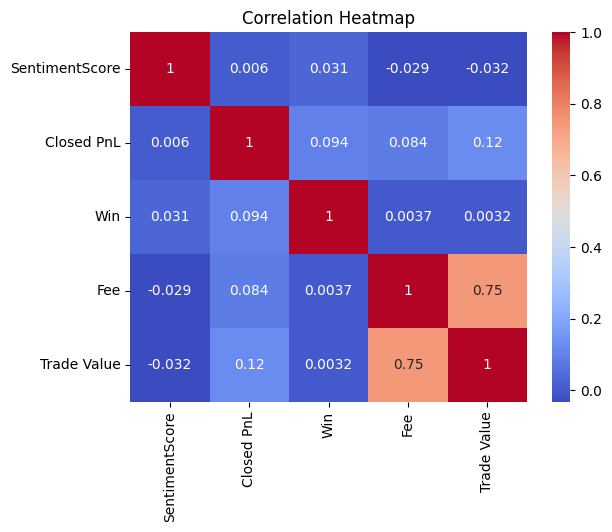

In [95]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Sentiment vs Win Rate

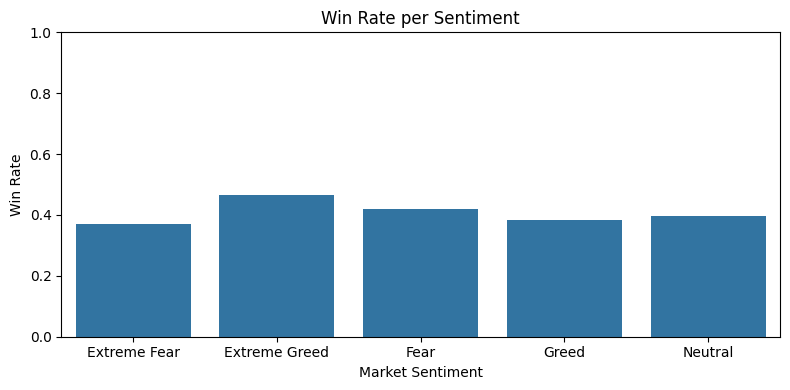

In [96]:
sentiment_winrate = merged_df.groupby('classification')['Win'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=sentiment_winrate, x='classification', y='Win')
plt.title('Win Rate per Sentiment')
plt.ylabel('Win Rate')
plt.xlabel('Market Sentiment')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Time Series of Average PnL per Sentiment

Average PnL per Sentiment per Week

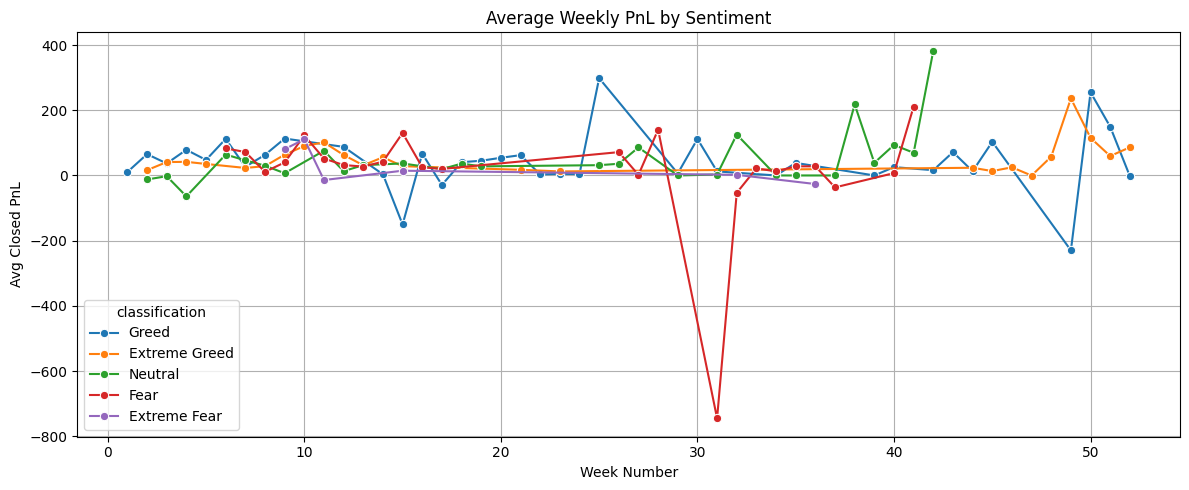

In [108]:
# Group by Week + Sentiment
weekly_pnl = merged_df.groupby(['Week', 'classification'])['Closed PnL'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_pnl, x='Week', y='Closed PnL', hue='classification', marker='o')
plt.title('Average Weekly PnL by Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Week Number')
plt.grid(True)
plt.tight_layout()
plt.show()

Average PnL per Sentiment per Day of Week

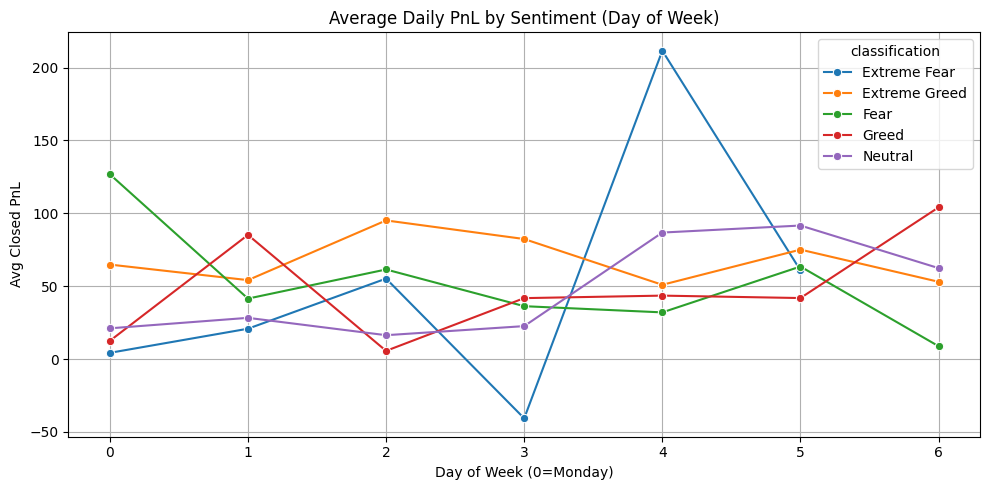

In [109]:
dow_pnl = merged_df.groupby(['DayOfWeek', 'classification'])['Closed PnL'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=dow_pnl, x='DayOfWeek', y='Closed PnL', hue='classification', marker='o')
plt.title('Average Daily PnL by Sentiment (Day of Week)')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Day of Week (0=Monday)')
plt.grid(True)
plt.tight_layout()
plt.show()

Average PnL by Hour and Sentiment

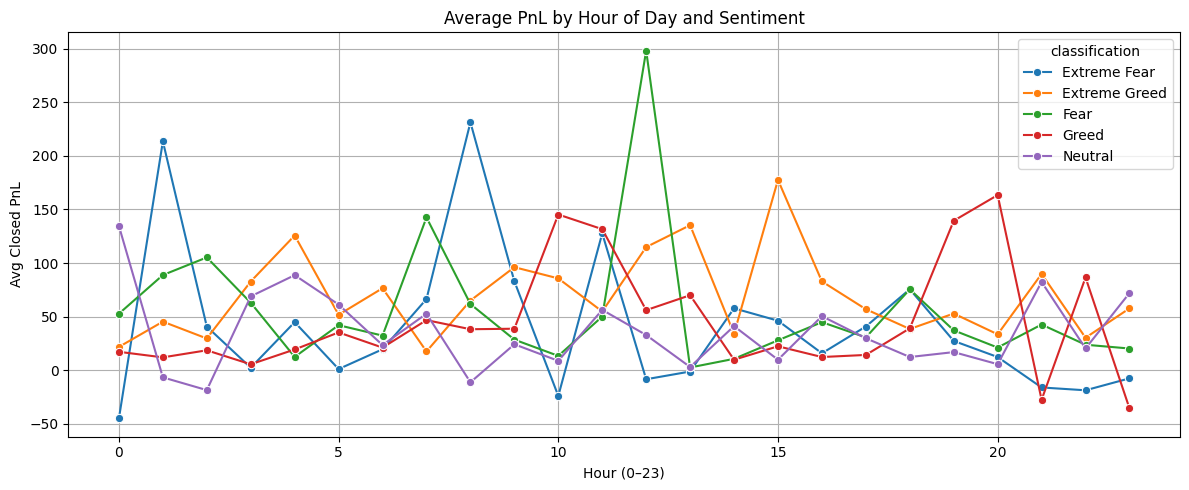

In [110]:
hourly_pnl = merged_df.groupby(['Hour', 'classification'])['Closed PnL'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_pnl, x='Hour', y='Closed PnL', hue='classification', marker='o')
plt.title('Average PnL by Hour of Day and Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xlabel('Hour (0–23)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
trader_sentiment_perf = merged_df.groupby(['Account', 'classification']).agg(
    TotalPnL=('Closed PnL', 'sum'),
    AvgPnL=('Closed PnL', 'mean'),
    WinRate=('Win', 'mean'),
    Trades=('Closed PnL', 'count')
).reset_index()

# Optional: Pivot to make easier comparison
trader_perf_pivot = trader_sentiment_perf.pivot(index='Account', columns='classification', values='TotalPnL').fillna(0)

# Rank top 10 traders by Total PnL under Greed or overall
top_traders = trader_perf_pivot.sort_values(by='Greed', ascending=False).head(10)

In [112]:
top_traders.reset_index().head(10)

classification                                     Account   Extreme Fear  \
0               0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    9544.906134   
1               0x72743ae2822edd658c0c50608fd7c5c501b2afbd   33980.000000   
2               0x083384f897ee0f19899168e3b1bec365f52a9012  124769.221441   
3               0xbee1707d6b44d4d52bfe19e41f8a828645437aab   30774.092128   
4               0x430f09841d65beb3f27765503d0f850b8bce7713       0.000000   
5               0x513b8629fe877bb581bf244e326a047b249c4ff1  -71121.820704   
6               0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  166696.399486   
7               0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4   25672.838055   
8               0x4f93fead39b70a1824f981a54d4e55b278e9f760   74346.546606   
9               0x92f17e8d81a944691c10e753af1b1baae1a2cd0d    3425.960950   

classification  Extreme Greed          Fear          Greed        Neutral  
0                1.105305e+06  9.316516e+04  534058.236330  401309.434693  
1                0.000000e+00 -5.821975e+04  453595.318176       0.000000  
2               -4.028234e+04  1.113374e+06  276719.270187  125650.116740  
3                4.788115e+05  5.597880e+04  243399.513140   27116.682664  
4                1.242849e+05  5.615052e+03  227680.491734   58961.379730  
5                0.000000e+00  3.671662e+05  163047.664946  381330.494050  
6                2.049605e+04  2.967817e+05   96392.783186   97380.090931  
7                2.107269e+05  4.936428e+04   95937.394195   -2605.956471  
8                1.292177e+05 -1.912616e+04   79023.471493   45514.323221  
9                6.352027e+04 -6.215451e+02   60254.251561       0.000000

**Insights from Analysis**

- Most numerical features show skewed distributions, with many trades having small values for PnL, size, and fees, and a few trades with very large values.
- The distribution of `Hour`, `DayOfWeek`, and `Month` provides insights into the trading activity patterns over time.

- Boxplots revealed that while the median PnL is close to zero across all sentiments, there are significant outliers (large positive and negative PnL values) in all sentiment categories.
- Extreme Greed and Extreme Fear sentiments seem to have a wider spread of PnL outcomes, suggesting higher volatility or risk in these periods.
- Average trade values also appear to vary across sentiments.

- The heatmap showed a strong positive correlation between `Fee` and `Trade Value`, which is expected as fees are often a percentage of the trade value.
- Correlations between `SentimentScore` and other numerical features are relatively weak, suggesting that sentiment alone may not be a strong linear predictor of individual trade outcomes.

- The stacked bar plots illustrate the distribution of trading `Side` and `Direction` within each sentiment. This can reveal if certain sentiments are associated with more buying or selling pressure, or specific trading strategies.
- The distribution of `Coin` across sentiments shows which coins are traded more frequently during different market conditions, and the sentiment composition for each coin.

- The bar plot clearly shows the average win rate for each sentiment classification. Extreme Greed tends to have the highest win rate, while Extreme Fear and Greed have lower win rates. This suggests that trading during periods of extreme optimism might be associated with a higher probability of profitable trades on average.

- The line plot shows the trend of average weekly PnL for each sentiment, highlighting periods where certain sentiments were more profitable on average.
- The line plot shows the average PnL for each day of the week across different sentiments, revealing if certain days are more profitable for particular sentiments.
- The line plot shows the average PnL for each hour of the day across different sentiments, indicating if there are specific times of day when certain sentiments are more or less profitable.

- The `sentiment_grouped` table confirms the higher average PnL and win rate in Extreme Greed periods compared to others.
- The `account_sentiment` table allows for a detailed look at individual trader performance in different market conditions.
- The `pivot` table and derived columns help identify traders who perform better in greedy markets versus those who perform better in fearful markets or those who perform well in extreme conditions.
- The `account_risk_behavior` table quantifies high-risk trading behaviors and identifies potentially high-risk traders.
- The tables showing top traders by ROI in different sentiment categories highlight individuals who were most successful during those specific market conditions.

## Documentation and Insights Summary

This notebook performs an exploratory data analysis (EDA) to understand the relationship between market sentiment (Fear and Greed Index) and trader behavior and performance.

### Data Loading and Preparation

- The `fear_greed_index.csv` and `historical_data.csv` datasets were loaded into pandas DataFrames.
- Initial inspection of the data using `.head()`, `.describe()`, and `.info()` was performed to understand the structure, data types, and basic statistics of each dataset.
- Dates were converted to datetime objects to facilitate merging and time-based analysis.
- The two DataFrames were merged on the `date` column.
- Missing values in the `classification` column were identified and dropped, as they represented a small portion of the data and corresponded to a specific coin.
- Categorical columns (`Side`, `Direction`, `classification`) were standardized by stripping whitespace and capitalizing the first letter for consistency.
- Time-related features (Hour, Day of Week, Week, Month) were extracted from the `Timestamp IST` column.
- Unnecessary columns (`Timestamp`, `Timestamp IST`, `date`, `Order ID`, `Trade ID`, `Transaction Hash`) were dropped for the EDA.

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

- **Numerical Columns:** Histograms and boxplots were generated for numerical features (`Execution Price`, `Size Tokens`, `Size USD`, `Start Position`, `Closed PnL`, `Fee`, `Hour`, `DayOfWeek`, `Month`) to visualize their distributions and identify potential outliers.
- **Categorical Columns:** Count plots were created for categorical features (`classification`, `Side`, `Direction`, `Crossed`, `Coin`) to show the frequency of each category.

#### Bivariate Analysis

- **Numerical vs. Sentiment:** Boxplots were used to visualize the distribution of numerical features across different sentiment classifications. This helps in understanding how metrics like PnL, trade size, and fees vary with market sentiment.
- **Pairwise Numeric Relationships:** A pair plot was generated to visualize the relationships between numerical columns, with points colored by sentiment classification. This helps in identifying potential correlations and patterns.
- **Correlation Heatmap:** A heatmap of the correlation matrix for numerical features was created to quantify the linear relationships between these variables.
- **Categorical vs. Categorical:** Stacked bar plots were used to show the proportion of each sentiment classification within different categories of 'Side', 'Direction', and 'Coin'. This provides insights into how trading behavior and coin preference relate to market sentiment.

### Feature Engineering

- **Performance Metrics per Trade:** New features like `Trade Value` (Execution Price * Size Tokens) and `Win` (binary indicator for positive Closed PnL) were created to better evaluate trade outcomes.
- **Sentiment-Grouped Features:** The data was grouped by sentiment classification to calculate aggregate metrics such as mean PnL, win rate, average fee, and average trade value for each sentiment category. This provides a high-level view of performance under different market conditions.
- **Trader Behavior Under Sentiment:** The data was grouped by `Account` and `classification` to analyze individual trader performance metrics (Total PnL, Win Rate, Avg PnL, Total PnL, Std PnL, ROI, Avg Trade Value, Max Drawdown, Trading Frequency) under each sentiment.
- **Contrarian Strength:** The `performance_pivot` table was created to compare Total PnL across different sentiments for each trader. New columns `Greed_vs_Fear` and `Contrarian` were added to quantify the difference in performance between greed/fear and extreme greed/fear sentiments, respectively. Traders with a positive 'Contrarian' value were identified.
- **Behavioral Features:** Features like `Is High Leverage` and `Is Large Trade` were created to identify high-risk trading behaviors. The proportion of these behaviors and the total number of trades were calculated per account.

### Insights from Visualizations

- **Univariate Analysis:**
    - Most numerical features show skewed distributions, with many trades having small values for PnL, size, and fees, and a few trades with very large values (indicated by the long tails in histograms and outliers in boxplots).
    - The distribution of `Hour`, `DayOfWeek`, and `Month` provides insights into the trading activity patterns over time.
- **Bivariate Analysis:**
    - **Numerical vs. Sentiment:** Boxplots revealed that while the median PnL is close to zero across all sentiments, there are significant outliers (large positive and negative PnL values) in all sentiment categories. Extreme Greed and Extreme Fear sentiments seem to have a wider spread of PnL outcomes, suggesting higher volatility or risk in these periods. Average trade values also appear to vary across sentiments.
    - **Correlation Heatmap:** The heatmap showed a strong positive correlation between `Fee` and `Trade Value`, which is expected as fees are often a percentage of the trade value. Correlations between `SentimentScore` and other numerical features are relatively weak, suggesting that sentiment alone may not be a strong linear predictor of individual trade outcomes.
    - **Categorical vs. Categorical:** The stacked bar plots illustrate the distribution of trading `Side` and `Direction` within each sentiment. This can reveal if certain sentiments are associated with more buying or selling pressure, or specific trading strategies (e.g., opening longs/shorts, closing positions). The distribution of `Coin` across sentiments shows which coins are traded more frequently during different market conditions, and the sentiment composition for each coin (as further analyzed in the `sentiment_proportions` table).
- **Sentiment vs. Win Rate:** The bar plot clearly shows the average win rate for each sentiment classification. Extreme Greed tends to have the highest win rate, while Extreme Fear and Greed have lower win rates. This suggests that trading during periods of extreme optimism might be associated with a higher probability of profitable trades on average.
- **Time Series of Average PnL per Sentiment:**
    - **Weekly PnL:** The line plot shows the trend of average weekly PnL for each sentiment. This can highlight periods where certain sentiments were more profitable on average.
    - **Daily PnL:** The line plot shows the average PnL for each day of the week across different sentiments. This can reveal if certain days are more profitable for particular sentiments.
    - **Hourly PnL:** The line plot shows the average PnL for each hour of the day across different sentiments. This can indicate if there are specific times of day when certain sentiments are more or less profitable.

### Trader Analysis

- **Sentiment-Grouped Aggregates:** The `sentiment_grouped` table provides aggregate performance metrics for each sentiment classification across all traders. This confirms the higher average PnL and win rate in Extreme Greed periods compared to others.
- **Trader Behavior Under Sentiment:** The `account_sentiment` table shows the total PnL, average win rate, and total trade value for each trader under each sentiment. This allows for a detailed look at individual trader performance in different market conditions.
- **Greed vs. Fear Favoring Traders:** The `pivot` table and the derived `greed_vs_fear` and `extreme_greed_fear_diff` columns help identify traders who perform better in greedy markets (Greed-favoring) versus those who perform better in fearful markets (Fear-hedgers) or those who perform well in extreme conditions (Contrarian).
- **High-Risk Behavior:** The `account_risk_behavior` table quantifies the frequency of high-leverage and large trades for each account, and identifies potentially high-risk traders.
- **Top Traders by ROI:** The tables showing top 10 traders by ROI in different sentiment categories highlight individuals who were most successful during those specific market conditions.

Overall, the analysis suggests that market sentiment does have an impact on trading outcomes, with Extreme Greed periods generally associated with higher average PnL and win rates. However, individual trader performance varies significantly, and some traders demonstrate the ability to profit even in fearful or extreme market conditions. Further analysis could delve deeper into the strategies employed by successful traders in different sentiment environments.